In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import h5py

In [3]:
dff_path = r'/Volumes/My Passport/Openscope Motion/ophys_session_923803144/ophys_experiment_924134723/924134723_dff.h5'

In [2]:
# stim_table = pd.read_csv(r'/Volumes/Brain2018/Openscope_Motion/stim_tables/923803144_stim_table.csv')
stim_table = pd.read_csv(r'/Users/saskiad/Dropbox/Openscope Motion/stim_tables/923803144_stim_table.csv')

In [3]:
stim_table.head()

,Unnamed: 0,start,end,start_frame,Unnamed: 0.1,approachSpeed,centerLocation,direction,dotNum,dotSize,dotSpeed,motion,duration
0,0,143.0,173.0,3900,65,0.096,-50-10,backward,11882,1,19,translation,30.0
1,1,16215.0,16245.0,3900,65,0.096,-50-10,backward,11882,1,19,translation,30.0
2,2,29157.0,29187.0,3900,65,0.096,-50-10,backward,11882,1,19,translation,30.0
3,3,34996.0,35026.0,3900,65,0.096,-50-10,backward,11882,1,19,translation,30.0
4,4,54137.0,54167.0,3900,65,0.096,-50-10,backward,11882,1,19,translation,30.0


In [4]:
stim_table.rename(columns={'Unnamed: 0.1':'condition'}, inplace=True)

In [5]:
rotation = stim_table[stim_table.motion=='rotation']#(stim_table.dotSize==8)&(stim_table.dotNum==1000)]

translation = stim_table[stim_table.motion=='translation']#stim_table.dotNum==1184]

rotation['newSpeed'] = np.NaN
rotation.ix[rotation.direction=='left', 'newSpeed'] = -1*rotation.dotSpeed
rotation.ix[rotation.direction=='right', 'newSpeed'] = rotation.dotSpeed

translation['newSpeed'] = np.NaN
translation.ix[translation.direction=='backward', 'newSpeed'] = -1*translation.dotSpeed
translation.ix[translation.direction=='forward', 'newSpeed'] = translation.dotSpeed

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/saskiad/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [6]:
len(translation.newSpeed.unique())

12

In [7]:
len(rotation.newSpeed.unique())

12

In [60]:
numbercells=250

In [61]:
response_matrix = np.empty((12,2,numbercells))

In [403]:
stim_table[stim_table.direction=='right'].condition.unique()

array([135, 157, 107, 100,  79, 179, 133, 114,  92,  99,  96, 119, 178,
       174, 130, 148, 106, 123, 169, 140, 160,  86,  74, 127, 149, 156,
        88, 158, 155, 150, 172,  75,  78, 152, 118, 132,  72, 117, 170,
       144,  73, 131, 112, 126, 143, 120,  89, 128, 166, 134, 139, 103,
       147,  87])

In [38]:
frames = np.arange(0,10800,60)

In [48]:
rotation.head()

,Unnamed: 0,start,end,start_frame,condition,approachSpeed,centerLocation,direction,dotNum,dotSize,dotSpeed,motion,duration,newSpeed
80,80,624.0,654.0,8340,139,NaN,NaN,right,1000,8,10,rotation,30.0,10.0
81,81,15492.0,15523.0,8340,139,NaN,NaN,right,1000,8,10,rotation,31.0,10.0
82,82,22535.0,22565.0,8340,139,NaN,NaN,right,1000,8,10,rotation,30.0,10.0
83,83,40714.0,40744.0,8340,139,NaN,NaN,right,1000,8,10,rotation,30.0,10.0
84,84,50947.0,50977.0,8340,139,NaN,NaN,right,1000,8,10,rotation,30.0,10.0


Size: translation: 1, 2, rotation: 5, 8, 12 (different units, I think 1=5, 2=10)

Speed: translation: 10, 19, 49, 99, 199, 398, rotation: 10,20,50,100,200,400

DotNum: translation 485, 1184, 2258, 2888, 5180, 11882
    rotation: 300, 545, 1000

In [14]:
rotation.sort_values('newSpeed').drop_duplicates('condition').newSpeed.values

array([-400., -400., -400., -400., -400., -400., -400., -400., -400.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -100., -100., -100., -100., -100., -100., -100., -100., -100.,
        -50.,  -50.,  -50.,  -50.,  -50.,  -50.,  -50.,  -50.,  -50.,
        -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,  -20.,
        -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,  -10.,
         10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         20.,   20.,   20.,   20.,   20.,   20.,   20.,   20.,   20.,
         50.,   50.,   50.,   50.,   50.,   50.,   50.,   50.,   50.,
        100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,
        200.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,
        400.,  400.,  400.,  400.,  400.,  400.,  400.,  400.,  400.])

In [19]:
for sp in np.sort(rotation.newSpeed.unique()):
    print sp, rotation[rotation.newSpeed==sp].condition.unique()

-400.0 [ 85 111  82 167  95  81 136 176 146]
-200.0 [105 101 145 163 125 115 138 102 164]
-100.0 [137 162  91 171 159 153  84 165 177]
-50.0 [154  93  80 129  90 175 109 142 110]
-20.0 [173 121  94 168 141 108  97 122  83]
-10.0 [ 98 151  76 116 104 113 124  77 161]
10.0 [139  86 128 155 169 149  74 158 147]
20.0 [131  89 117 152 106 100  99 174 178]
50.0 [148 123 172  75 119 107  87  73 150]
100.0 [ 72 133 112 160 118 120 144 170  79]
200.0 [140 103 134  88  78 132  96 143 157]
400.0 [130 114  92 135 127 166 179 156 126]


In [26]:
response[rotation[rotation.newSpeed==sp].condition.unique(),:,0].mean(axis=0).shape

(161,)

In [8]:
r_conds = rotation.sort_values('newSpeed').drop_duplicates('condition').condition.values
print r_conds

[167 176 111 146  95 136  81  85  82 115 125 105 138 102 163 164 145 101
 153 171 165 159 177  91 137  84 162 142 175 129 110  93  90 109  80 154
  97 168 141 122 108  94 173  83 121 116 113 104 151  77  98 124  76 161
 169  86 158 149 139  74 147 128 155 174  89 106 131  99 100 117 152 178
 150 148 119  75 107 172 123  87  73 160 112  79 144  72 133 118 170 120
 143 103 157 140  96 134  78  88 132 114 166 127 179  92 126 156 130 135]


In [9]:
t_conds = translation.sort_values('newSpeed').drop_duplicates('condition').condition.values
print t_conds

[61 67  2 13 10 28 42 59  7  6 17 55 58 15  0 22 70 54 51 57 37 14 19  5
 43 33 65  1 68  9  3 56 21 23 20  8 62 12 35 69 31 60  4 39 38 34 26 11
 47 40 49 32 29 50 36 53 64 24 44 16 41 71 46 45 25 18 63 52 30 48 66 27]


In [98]:
response_matrix[:,0,:] = old_response[r_conds,:,0]
response_matrix[:,1,:] = old_response[t_conds,:,0]

In [103]:
matrix_new = response_matrix.reshape(-1, response_matrix.shape[2])

In [123]:
matrix_new.shape

(24, 218)

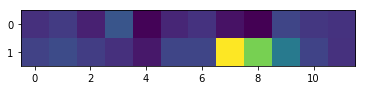

In [86]:
nc=15
plt.imshow(response_matrix[:,:,nc].T)

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [109]:
matrix_new = matrix_new[:,np.isfinite(matrix_new[0,:])]

In [170]:
matrix_new = matrix_new[:,resp]

In [171]:
n_clusters = 12  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(matrix_new.T)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=12,
            pooling_func='deprecated')

In [172]:
labels = ward.fit_predict(matrix_new.T)

In [173]:
labels

array([11,  1, 11, 11, 11,  1, 11, 11, 11,  7, 11,  1,  2,  8,  2, 11,  5,
       11,  1,  9,  5, 11, 11, 11, 11,  3, 11,  4,  1,  5, 11,  5, 11, 11,
       11,  1, 11, 11, 11,  5,  4,  2,  1, 11, 11, 11,  1,  1, 11,  1, 11,
       11, 11, 11, 11,  5, 11, 11,  5,  1, 11, 11,  5, 11,  2, 11, 11, 11,
       11,  5,  5, 11, 11,  5, 11, 11, 11, 11,  2,  2, 11, 11, 11, 11,  5,
        6,  5, 11, 11, 11, 11, 10, 11,  0,  5,  0, 11,  1, 11, 11, 11, 11])

60


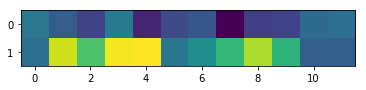

In [197]:
cluster=11
plt.imshow(matrix_new[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
print len(np.where(labels==cluster)[0])

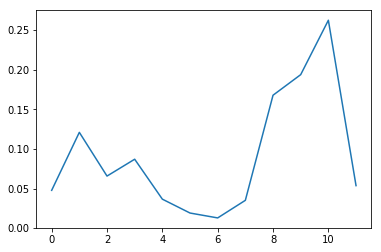

In [194]:
plt.plot(matrix_new[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2))[:,1])

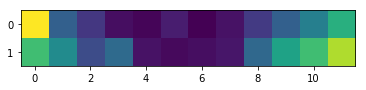

In [183]:
plt.imshow(matrix_new[:,np.where(labels==0)[0]].mean(axis=1).reshape((12,2)).T)

In [168]:
resp = np.unique(np.where(matrix_new>0.07)[1])

In [169]:
resp

array([  6,   8,   9,  11,  12,  13,  18,  23,  24,  25,  26,  33,  36,
        38,  39,  42,  43,  46,  47,  48,  50,  53,  69,  74,  75,  77,
        79,  80,  82,  84,  86,  87,  88,  89,  91,  94, 100, 101, 102,
       105, 107, 108, 110, 111, 112, 115, 119, 122, 124, 125, 126, 127,
       130, 131, 132, 134, 138, 140, 143, 144, 145, 146, 147, 148, 149,
       150, 156, 159, 161, 162, 163, 164, 165, 168, 169, 170, 172, 173,
       174, 175, 176, 179, 182, 183, 184, 185, 187, 188, 189, 190, 191,
       194, 195, 199, 200, 202, 207, 209, 213, 214, 215, 217])

In [130]:
matrix_new.shape

(24, 218)

In [136]:
np.where(labels==1)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,  27,  28,
        29,  30,  31,  32,  34,  35,  37,  40,  41,  42,  44,  45,  46,
        49,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  78,  79,  81,  83,  85,  86,  88,  89,  90,  91,  92,  93,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 106, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 123, 124, 126, 127,
       128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141,
       142, 145, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 164, 165, 166, 167, 169, 170, 171, 172, 173, 176,
       177, 178, 179, 180, 181, 182, 183, 186, 188, 189, 190, 191, 192,
       193, 195, 196, 197, 198, 201, 203, 204, 205, 206, 207, 208, 210,
       211, 212, 213, 214, 215, 216, 217])

## Cluster all the data

In [241]:
r_conds

array([167, 115, 177, 142, 173,  98, 139, 106,  75, 120, 134, 126])

In [243]:
len(t_conds)

12

In [37]:

for i,expt in enumerate(dot_expts):
    print(i)
    filename = os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/analysis_files', str(expt)+'_analysis.h5')
    f = h5py.File(filename, 'r')
    response = f['response'][()]
    f.close()
    numbercells = response.shape[1]
    print(numbercells)
#     stim_table = pd.read_hdf(filename, 'stim_table')
#     stim_table.rename(columns={'Unnamed: 0.1':'condition'}, inplace=True)
#     #get single dotSize and density
#     rotation = stim_table[(stim_table.dotSize==8)&(stim_table.dotNum==1000)]
#     translation = stim_table[stim_table.dotNum==1184]

#     rotation['newSpeed'] = np.NaN
#     rotation.ix[rotation.direction=='left', 'newSpeed'] = -1*rotation.dotSpeed
#     rotation.ix[rotation.direction=='right', 'newSpeed'] = rotation.dotSpeed
#     translation['newSpeed'] = np.NaN
#     translation.ix[translation.direction=='backward', 'newSpeed'] = -1*translation.dotSpeed
#     translation.ix[translation.direction=='forward', 'newSpeed'] = translation.dotSpeed
    
    response_matrix = np.empty((12,2,numbercells))
    
    for spi,sp in enumerate(np.sort(rotation.newSpeed.unique())):
        response_matrix[spi,0,:] = response[rotation[rotation.newSpeed==sp].condition.unique(),:,0].mean(axis=0)
    
    for spi,sp in enumerate(np.sort(translation.newSpeed.unique())):
        response_matrix[spi,1,:] = response[translation[translation.newSpeed==sp].condition.unique(),:,0].mean(axis=0)
    
#     response_matrix[:,0,:] = response[r_conds,:,0]
#     response_matrix[:,1,:] = response[t_conds,:,0]
    
    matrix_new = response_matrix.reshape(-1, response_matrix.shape[2])
    #get rid of NaN
    matrix_new = matrix_new[:,np.isfinite(matrix_new[0,:])]
    #get "responsive" cells
    resp = np.unique(np.where(matrix_new>0.05)[1])
    matrix_new = matrix_new[:,resp]
    
    num_resp_cells = matrix_new.shape[1]
    print(num_resp_cells)
    expt_ids = np.empty((num_resp_cells))
#     expt_areas = np.empty((num_resp_cells))
    expt_ids[:] = expt
#     expt_areas[:] = dot_areas[i]
    
    if i==0:
        matrix_all = np.copy(matrix_new)
        expt_ids_all = np.copy(expt_ids)
    else:
        matrix_all = np.hstack((matrix_all, matrix_new))
        expt_ids_all = np.hstack((expt_ids_all, expt_ids))
#     expt_areas_all = np.append(expt_areas_all, expt_areas)

0
161
53
1
200
64
2
214
66
3
167
23
4
250
80
5
179
37
6
221
97
7
180
66


In [38]:
matrix_all.shape

(24, 486)

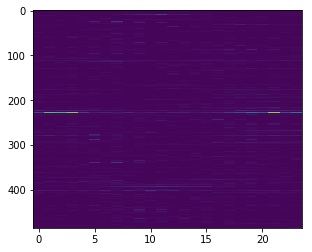

In [39]:
plt.imshow(matrix_all.T, aspect=.04)

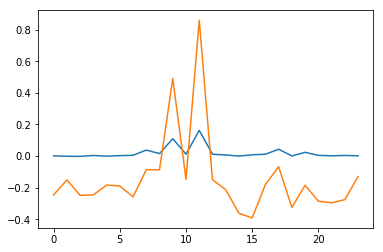

In [268]:
nc=0
plt.plot(matrix_all[:,nc])
plt.plot(matrix_z[:,nc])

In [269]:
temp = matrix_all[:,0]

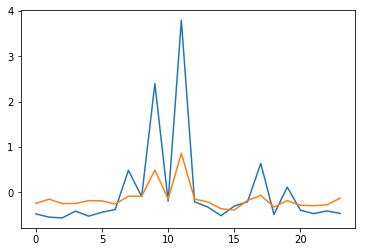

In [273]:
plt.plot(st.zscore(temp))
plt.plot(matrix_z[:,nc])

In [232]:
np.unique(expt_ids_all)

array([9.23201739e+08, 9.23531162e+08, 9.23685768e+08, 9.23803144e+08,
       9.24496653e+08, 9.24667518e+08, 9.25166866e+08, 9.25172886e+08])

In [112]:
n_clusters = 4#12  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(matrix_z.T)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [113]:
labels = ward.fit_predict(matrix_z.T)

In [114]:
labels

array([2, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0,
       0, 1, 3, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 3, 1, 2, 0, 0,
       0, 0, 2, 0, 1, 3, 1, 0, 2, 2, 2, 0, 2, 0, 3, 1, 3, 1, 2, 1, 1, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 3, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       3, 2, 2, 3, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 3, 1, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 3, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 1,
       2, 1, 2, 0, 3, 0, 3, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0,
       3, 1, 2, 1, 3, 3, 3, 3, 1, 1, 2, 0, 1, 1, 3, 0, 1, 1, 0, 1, 0, 2,
       1, 0, 1, 3, 0, 1, 1, 2, 3, 0, 3, 0, 0, 2, 2, 3, 2, 0, 0, 1, 0, 1,
       0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 1, 3, 1, 2, 0, 0, 1, 3, 2, 2, 2,
       1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 1, 1, 2, 1, 0, 0, 0, 1, 3, 3, 3, 1,
       3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 3, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0,
       3, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 3,

In [41]:
import scipy.stats as st

In [42]:
matrix_all.shape

(24, 486)

In [44]:
matrix_z = np.empty_like(matrix_all)
for i in range(486):
    matrix_z[:,i] = st.zscore(matrix_all[:,i])

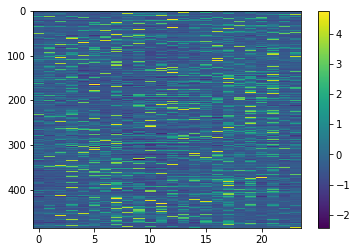

In [45]:
plt.imshow(matrix_z.T, aspect=0.04)
plt.colorbar()

52
0.106995884774


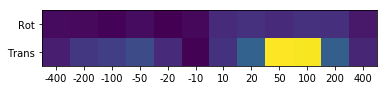

In [95]:
cluster=3
plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
print len(np.where(labels==cluster)[0])
print(len(np.where(labels==cluster)[0])/float(len(labels)))

119
0.244855967078
56
0.115226337449
58
0.119341563786
44
0.0905349794239
68
0.139917695473
53
0.109053497942
36
0.0740740740741
52
0.106995884774


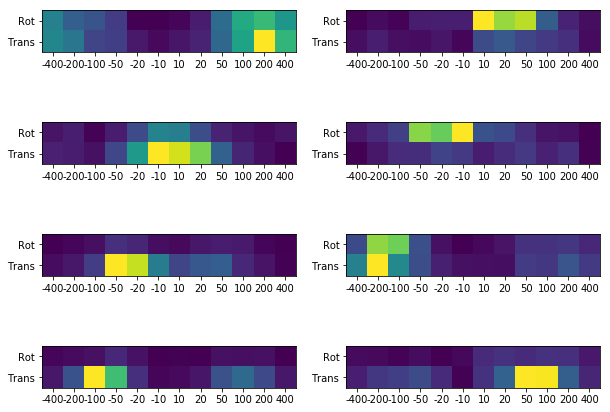

In [83]:
plt.figure(figsize=(10,12))
for cluster in range(8):
    ax=plt.subplot(6,2,cluster+1)
    plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
    plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
    plt.yticks(range(2), ['Rot','Trans'])
    print len(np.where(labels==cluster)[0])
    print(len(np.where(labels==cluster)[0])/float(len(labels)))

In [292]:
np.sort(rotation.newSpeed.unique())

array([-400., -200., -100.,  -50.,  -20.,  -10.,   10.,   20.,   50.,
        100.,  200.,  400.])

In [65]:
for i in range(12):
    print(len(np.where(labels==i)[0])/float(len(labels)))

0.0905349794239
0.139917695473
0.125514403292
0.106995884774
0.0617283950617
0.059670781893
0.0740740740741
0.0699588477366
0.119341563786
0.0493827160494
0.0555555555556
0.0473251028807


In [323]:
cluster = 0
expt_ids_all[np.where(labels==cluster)[0]]

array([9.25172886e+08, 9.25172886e+08, 9.25172886e+08, 9.25172886e+08,
       9.25172886e+08, 9.25172886e+08, 9.25172886e+08, 9.25172886e+08,
       9.25172886e+08, 9.25166866e+08, 9.25166866e+08, 9.25166866e+08,
       9.25166866e+08, 9.25166866e+08, 9.25166866e+08, 9.25166866e+08,
       9.25166866e+08, 9.25166866e+08, 9.25166866e+08, 9.25166866e+08,
       9.25166866e+08, 9.25166866e+08, 9.24667518e+08, 9.24667518e+08,
       9.24667518e+08, 9.24667518e+08, 9.24667518e+08, 9.24667518e+08,
       9.24667518e+08, 9.24667518e+08, 9.24667518e+08, 9.24496653e+08,
       9.24496653e+08, 9.24496653e+08, 9.24496653e+08, 9.24496653e+08,
       9.24496653e+08, 9.24496653e+08, 9.23803144e+08, 9.23803144e+08,
       9.23803144e+08, 9.23803144e+08, 9.23803144e+08, 9.23803144e+08,
       9.23803144e+08, 9.23803144e+08, 9.23803144e+08, 9.23803144e+08,
       9.23803144e+08, 9.23803144e+08, 9.23803144e+08, 9.23803144e+08,
       9.23685768e+08, 9.23685768e+08, 9.23685768e+08, 9.23685768e+08,
      

In [314]:
dot_expts

[925172886,
 925166866,
 924667518,
 924496653,
 923803144,
 923685768,
 923531162,
 923201739]

In [322]:
np.where(np.array(dot_expts)==925172886.0)[0][0]

0

In [345]:
cluster = 0
cluster_areas = []
cluster_expts_ids = expt_ids_all[np.where(labels==cluster)[0]]
for i in cluster_expts_ids:
    cid = np.where(np.array(dot_expts)==i)[0][0]
    cluster_areas.append(dot_areas[cid])
               
for a in areas:
    print a, np.round(100*cluster_areas.count(a)/float(expt_areas_all.count(a)),1)

VISl 19.1
VISal 17.5
VISpm 13.6
VISam 15.6


In [115]:
cluster_percent = np.empty((4,4))
for cluster in range(4):
    cluster_areas = []
    cluster_expts_ids = expt_ids_all[np.where(labels==cluster)[0]]
    for i in cluster_expts_ids:
        cid = np.where(np.array(dot_expts)==i)[0][0]
        cluster_areas.append(dot_areas[cid])
    for j,a in enumerate(areas):
        cluster_percent[cluster, j] = 100*cluster_areas.count(a)/float(expt_areas_all.count(a))

In [353]:
np.max(cluster_percent)

27.272727272727273

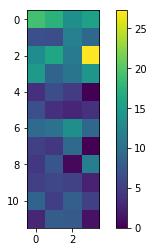

In [352]:
plt.imshow(cluster_percent)
plt.colorbar()

In [333]:
areas = ['VISl','VISal','VISpm','VISam']

In [69]:
expt_areas_all = []
for i in expt_ids_all:
    eid = np.where(np.array(dot_expts)==i)[0][0]
    expt_areas_all.append(dot_areas[eid])

In [338]:
for a in areas:
    print a, expt_areas_all.count(a)

VISl 136
VISal 137
VISpm 169
VISam 77


In [363]:
for cluster in range(12):
    plt.figure(figsize=(6,6))
    plt.subplot(211)
    plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
    plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
    plt.yticks(range(2), ['Rot','Trans'])
    plt.xlabel("Speed")
    plt.subplot(212)
    plt.bar(range(4),cluster_percent[cluster,:])
    plt.ylim(0,30)
    plt.xticks(range(4), areas)
    plt.ylabel("Percent of neurons")
    plt.suptitle("Cluster "+str(cluster))
#     plt.savefig(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/Documents', 'dot_cluster_'+str(cluster)+'.png'))
    plt.close()

Text(0.5,0.98,'Cluster 5')

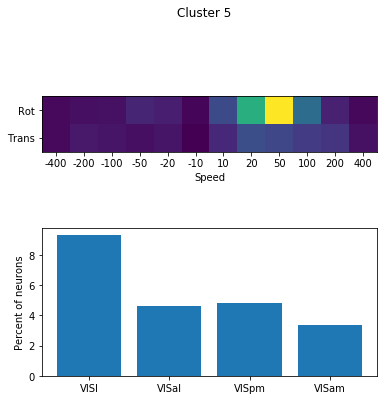

In [77]:
cluster=5
plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
plt.xlabel("Speed")
plt.subplot(212)
plt.bar(range(4),cluster_percent[cluster,:])
# plt.ylim(0,30)
plt.xticks(range(4), areas)
plt.ylabel("Percent of neurons")
plt.suptitle("Cluster "+str(cluster))


In [560]:
len(np.where(labels==cluster)[0])

37

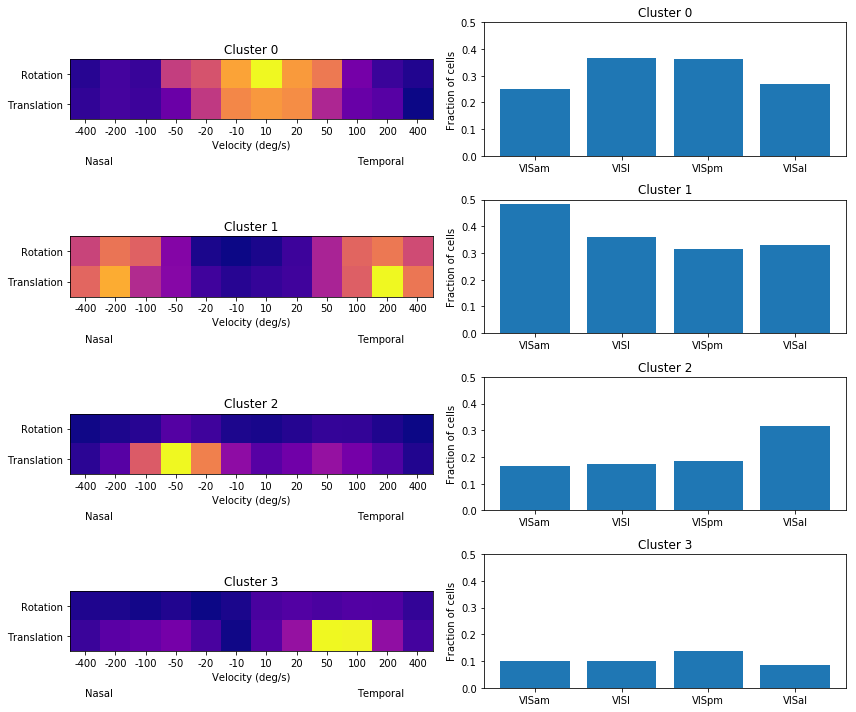

In [128]:
plt.figure(figsize=(12,10))
for cluster in range(4):
    plt.subplot(4,2,(cluster*2)+1)
    plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T, cmap='plasma')
    plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
    plt.yticks(range(2), ['Rotation','Translation'])
    plt.xlabel("Velocity (deg/s)")
    plt.text(0,3,"Nasal")
    plt.text(9,3,"Temporal")
    plt.title("Cluster "+str(cluster))#+": n="+str(len(np.where(labels==cluster)[0])))
    plt.subplot(4,2,(cluster*2)+2)
    plt.bar(range(4),cluster_percent[cluster,[3,0,2,1]]/100.)
    plt.ylim(0,.5)
    plt.xticks(range(4), ['VISam','VISl','VISpm','VISal'])#areas)
    plt.ylabel("Fraction of cells")
    plt.title("Cluster "+str(cluster))#+": n="+str(len(np.where(labels==cluster)[0])))
plt.tight_layout()

In [ ]:
# am, l, pm, al
#[3,0,2,1]

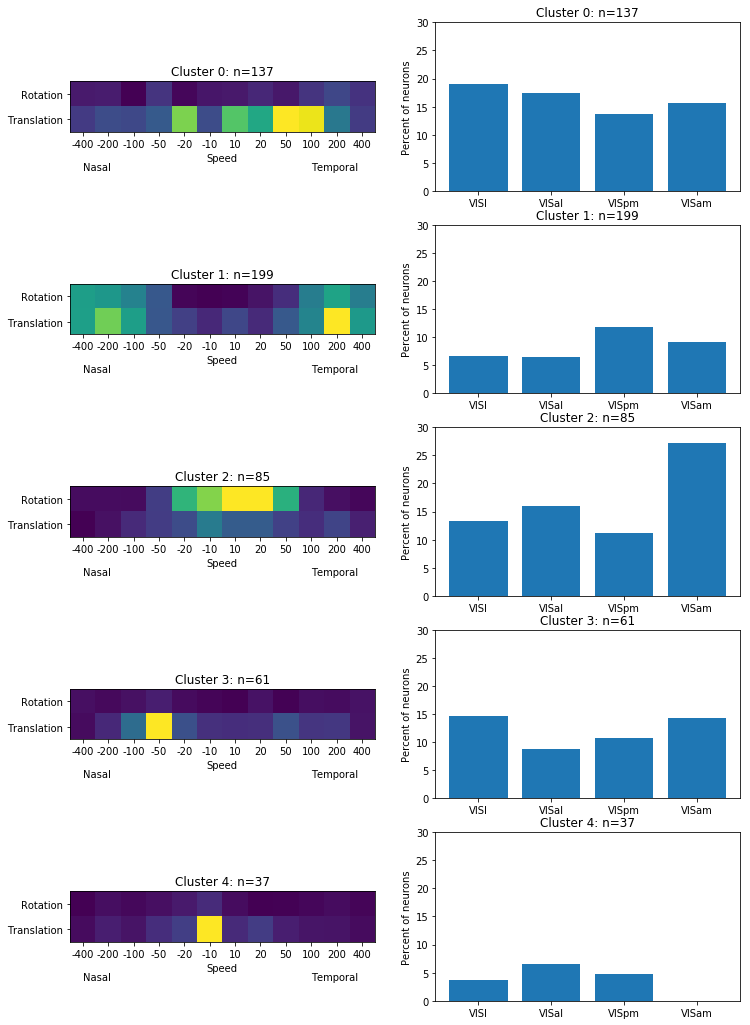

In [576]:
plt.figure(figsize=(12,18))
for cluster in range(5):
    plt.subplot(5,2,(cluster*2)+1)
    plt.imshow(matrix_z[:,np.where(labels==cluster)[0]].mean(axis=1).reshape((12,2)).T)
    plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
    plt.yticks(range(2), ['Rotation','Translation'])
    plt.xlabel("Speed")
    plt.text(0,3,"Nasal")
    plt.text(9,3,"Temporal")
    plt.title("Cluster "+str(cluster)+": n="+str(len(np.where(labels==cluster)[0])))
    plt.subplot(5,2,(cluster*2)+2)
    plt.bar(range(4),cluster_percent[cluster,:])
    plt.ylim(0,30)
    plt.xticks(range(4), areas)
    plt.ylabel("Percent of neurons")
    plt.title("Cluster "+str(cluster)+": n="+str(len(np.where(labels==cluster)[0])))

In [365]:
expt_areas_all.index('VISl')

0

In [369]:
from more_itertools import locate

visl = list(locate(expt_areas_all, lambda x: x == 'VISl'))
visal = list(locate(expt_areas_all, lambda x: x == 'VISal'))
vispm = list(locate(expt_areas_all, lambda x: x == 'VISpm'))
visam = list(locate(expt_areas_all, lambda x: x == 'VISam'))

Text(0.5,0,'Speed')

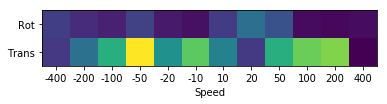

In [567]:
plt.imshow(matrix_z[:,visl].reshape((12,2,-1)).mean(axis=(2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
plt.xlabel("Speed")

Text(0.5,0,'Speed')

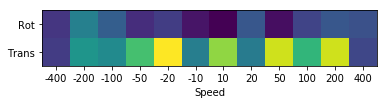

In [568]:
plt.imshow(matrix_z[:,visal].reshape((12,2,-1)).mean(axis=(2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
plt.xlabel("Speed")

Text(0.5,0,'Speed')

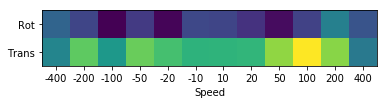

In [569]:
plt.imshow(matrix_z[:,vispm].reshape((12,2,-1)).mean(axis=(2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
plt.xlabel("Speed")

Text(0.5,0,'Speed')

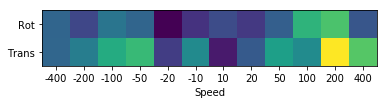

In [570]:
plt.imshow(matrix_z[:,visam].reshape((12,2,-1)).mean(axis=(2)).T)
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int))
plt.yticks(range(2), ['Rot','Trans'])
plt.xlabel("Speed")

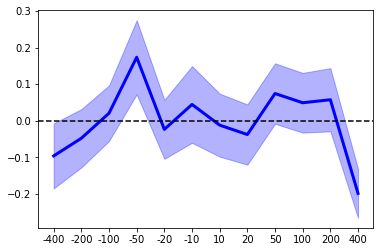

In [398]:
resp_mean = matrix_z[:,visl].reshape((12,2,-1)).mean(axis=(1,2))
resp_sem = matrix_z[:,visl].reshape((12,2,-1)).std(axis=(1,2))/np.sqrt(len(visl))
plt.fill_between(range(12), resp_mean+resp_sem, resp_mean-resp_sem, color='b', alpha=0.3)
plt.plot(resp_mean, color='b', lw=3)
plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int));

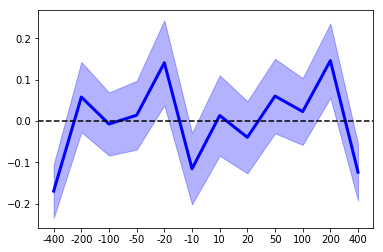

In [397]:
resp_mean = matrix_z[:,visal].reshape((12,2,-1)).mean(axis=(1,2))
resp_sem = matrix_z[:,visal].reshape((12,2,-1)).std(axis=(1,2))/np.sqrt(len(visal))
plt.fill_between(range(12), resp_mean+resp_sem, resp_mean-resp_sem, color='b', alpha=0.3)
plt.plot(resp_mean, color='b', lw=3)
plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int));

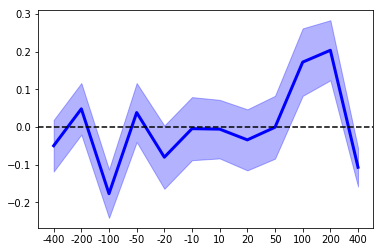

In [396]:
resp_mean = matrix_z[:,vispm].reshape((12,2,-1)).mean(axis=(1,2))
resp_sem = matrix_z[:,vispm].reshape((12,2,-1)).std(axis=(1,2))/np.sqrt(len(vispm))
plt.fill_between(range(12), resp_mean+resp_sem, resp_mean-resp_sem, color='b', alpha=0.3)
plt.plot(resp_mean, color='b', lw=3)
plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int));

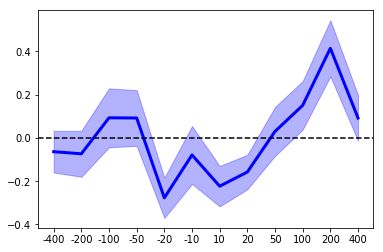

In [395]:
resp_mean = matrix_z[:,visam].reshape((12,2,-1)).mean(axis=(1,2))
resp_sem = matrix_z[:,visam].reshape((12,2,-1)).std(axis=(1,2))/np.sqrt(len(visam))
plt.fill_between(range(12), resp_mean+resp_sem, resp_mean-resp_sem, color='b', alpha=0.3)
plt.plot(resp_mean, color='b', lw=3)
plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(12), np.sort(rotation.newSpeed.unique()).astype(int));

In [401]:
print matrix_z[:,vispm].reshape((12,2,-1)).mean(axis=(1,2))[:6].mean()
print matrix_z[:,vispm].reshape((12,2,-1)).mean(axis=(1,2))[6:].mean()

-0.03775752029269798
0.03775752029269799


([<matplotlib.axis.XTick at 0x1a22420dd0>,
 <a list of 2 Text xticklabel objects>)

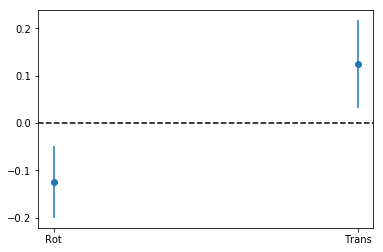

In [423]:
resp_mean = matrix_z[:,visl].reshape((12,2,-1)).mean(axis=(0,2))
resp_sem = matrix_z[:,visl].reshape((12,2,-1)).std(axis=(0,2))/np.sqrt(len(visl))
plt.errorbar(range(2), resp_mean, yerr=resp_sem, fmt='o')

plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(2), ['Rot','Trans'])

([<matplotlib.axis.XTick at 0x1a22d36390>,
 <a list of 2 Text xticklabel objects>)

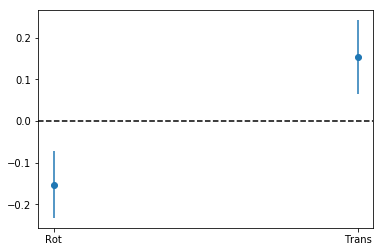

In [424]:
resp_mean = matrix_z[:,visal].reshape((12,2,-1)).mean(axis=(0,2))
resp_sem = matrix_z[:,visal].reshape((12,2,-1)).std(axis=(0,2))/np.sqrt(len(visal))
plt.errorbar(range(2), resp_mean, yerr=resp_sem, fmt='o')

plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(2), ['Rot','Trans'])

([<matplotlib.axis.XTick at 0x1a2235d8d0>,
 <a list of 2 Text xticklabel objects>)

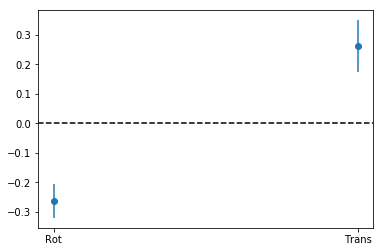

In [425]:
resp_mean = matrix_z[:,vispm].reshape((12,2,-1)).mean(axis=(0,2))
resp_sem = matrix_z[:,vispm].reshape((12,2,-1)).std(axis=(0,2))/np.sqrt(len(vispm))
plt.errorbar(range(2), resp_mean, yerr=resp_sem, fmt='o')

plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(2), ['Rot','Trans'])

([<matplotlib.axis.XTick at 0x1a226be050>,
 <a list of 2 Text xticklabel objects>)

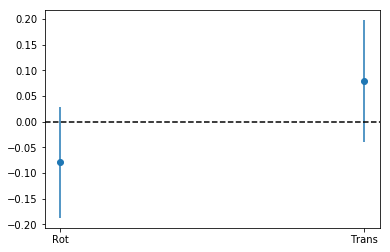

In [422]:
resp_mean = matrix_z[:,visam].reshape((12,2,-1)).mean(axis=(0,2))
resp_sem = matrix_z[:,visam].reshape((12,2,-1)).std(axis=(0,2))/np.sqrt(len(visam))
plt.errorbar(range(2), resp_mean, yerr=resp_sem, fmt='o')

plt.axhline(y=0, color='k', ls='--')
plt.xticks(range(2), ['Rot','Trans'])

In [427]:
matrix_all.shape

(24, 519)

In [428]:
matrix_red = np.empty((4,519))
matrix_red[0,:] = matrix_all[:6,:].mean(axis=0)
matrix_red[1,:] = matrix_all[6:12,:].mean(axis=0)
matrix_red[2,:] = matrix_all[12:18,:].mean(axis=0)
matrix_red[3,:] = matrix_all[18:,:].mean(axis=0)


In [432]:
matrix_red_z = np.empty_like(matrix_red)
for i in range(519):
    matrix_red_z[:,i] = st.zscore(matrix_red[:,i])

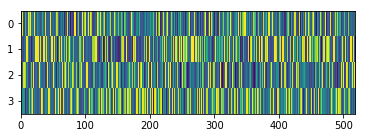

In [433]:
plt.imshow(matrix_red_z, aspect=40)

In [517]:
n_clusters = 8  # number of regions
ward_red = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_full_tree=True)
ward_red.fit(matrix_red_z.T)

AgglomerativeClustering(affinity='euclidean', compute_full_tree=True,
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func='deprecated')

In [518]:
labels_red = ward_red.fit_predict(matrix_red_z.T)

In [519]:
labels_red

array([1, 0, 6, 0, 0, 0, 0, 0, 1, 6, 1, 6, 2, 4, 6, 6, 7, 2, 0, 0, 6, 5,
       1, 7, 1, 1, 6, 1, 0, 7, 1, 7, 1, 4, 1, 0, 1, 3, 5, 1, 1, 0, 2, 7,
       7, 6, 5, 1, 1, 0, 0, 1, 0, 2, 3, 7, 6, 0, 2, 5, 4, 7, 1, 0, 0, 2,
       5, 5, 0, 1, 5, 1, 6, 5, 6, 1, 2, 0, 7, 0, 4, 5, 6, 4, 6, 7, 0, 2,
       0, 4, 5, 0, 5, 0, 4, 6, 1, 0, 4, 6, 2, 0, 1, 0, 6, 0, 2, 6, 1, 4,
       1, 4, 5, 5, 6, 1, 1, 0, 6, 6, 4, 7, 6, 6, 2, 7, 1, 7, 0, 6, 5, 0,
       7, 1, 1, 0, 4, 7, 4, 0, 5, 0, 4, 7, 6, 5, 4, 0, 7, 0, 0, 4, 7, 0,
       7, 3, 5, 1, 1, 7, 4, 4, 6, 1, 7, 0, 7, 0, 0, 7, 1, 6, 0, 0, 1, 5,
       2, 1, 2, 4, 2, 1, 0, 4, 2, 0, 0, 7, 7, 7, 2, 1, 4, 4, 5, 2, 6, 0,
       5, 1, 2, 5, 0, 2, 1, 3, 7, 5, 7, 4, 7, 5, 4, 4, 6, 4, 2, 7, 3, 1,
       3, 0, 1, 0, 0, 3, 6, 7, 0, 5, 7, 0, 7, 3, 2, 0, 5, 4, 2, 1, 1, 0,
       5, 6, 4, 1, 3, 4, 1, 2, 0, 1, 3, 1, 5, 0, 1, 4, 5, 4, 1, 6, 7, 0,
       1, 1, 3, 1, 6, 1, 1, 1, 0, 7, 5, 2, 2, 1, 5, 2, 2, 5, 7, 1, 3, 6,
       6, 2, 2, 1, 0, 0, 6, 0, 3, 6, 4, 2, 0, 0, 2,

60
0.115606936416


([<matplotlib.axis.XTick at 0x1a25510650>,
 <a list of 4 Text xticklabel objects>)

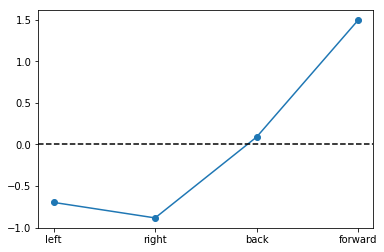

In [527]:
cluster=7
plt.plot(matrix_red_z[:,np.where(labels_red==cluster)[0]].mean(axis=1), 'o-')
plt.axhline(y=0, ls='--', color='k')
print len(np.where(labels_red==cluster)[0])
print(len(np.where(labels_red==cluster)[0])/float(len(labels_red)))
plt.xticks(range(4),['left','right','back','forward'])

In [504]:
ward_red.linkage

'ward'

In [58]:
import scipy.cluster.hierarchy as shc

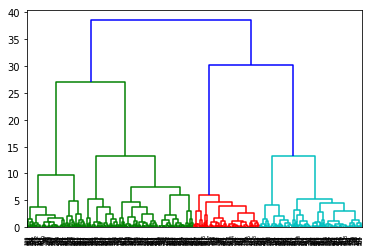

In [507]:
dend = shc.dendrogram(shc.linkage(matrix_red_z.T, method='ward'))

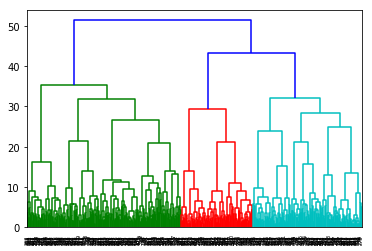

In [59]:
dend = shc.dendrogram(shc.linkage(matrix_z.T, method='ward'))

## Old Stuff

In [34]:
#compare with previous
filename = r'/Users/saskiad/Dropbox/Openscope Motion/analysis_files/923803144_analysis.h5'
f = h5py.File(filename)
old_response = f['response'][()]
f.close()
# stim_table = pd.read_hdf(filename, 'stim_table')
mean_sweep_response = pd.read_hdf(filename, 'mean_sweep_response')

In [36]:
old_response.shape

(180, 250, 2)

In [37]:
mean_sweep_response.shape

(1800, 250)

<ErrorbarContainer object of 3 artists>

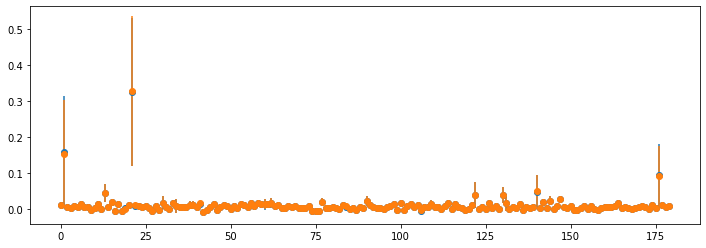

In [23]:
nc=16
plt.figure(figsize=(12,4))
plt.errorbar(range(180),response[:,nc,0], yerr=response[:,nc,1], fmt='o')
plt.errorbar(range(180),old_response[:,nc,0], yerr=old_response[:,nc,1], fmt='o')

In [3]:
import seaborn as sns

In [33]:
forward = stim_table[stim_table.direction=='forward']

In [16]:
temp = stim_table.join(mean_sweep_response)

In [17]:
temp.head()

,condition,start,end,start_frame,condition,approachSpeed,centerLocation,direction,dotNum,dotSize,...,240,241,242,243,244,245,246,247,248,249
0,0,143.0,173.0,3900,65,0.096,-50-10,backward,11882,1,...,0.641319,0.162810,0.401211,0.107713,0.004701,0.573682,0.042897,-0.004666,NaN,0.017387
1,1,16215.0,16245.0,3900,65,0.096,-50-10,backward,11882,1,...,0.013759,-0.018374,-0.001831,-0.007753,-0.019358,-0.022272,-0.001479,0.003061,NaN,-0.001129
2,2,29157.0,29187.0,3900,65,0.096,-50-10,backward,11882,1,...,0.002906,-0.006746,-0.015948,-0.012724,-0.007205,0.010173,-0.015551,-0.040067,NaN,-0.011814
3,3,34996.0,35026.0,3900,65,0.096,-50-10,backward,11882,1,...,0.200271,0.040515,0.040444,0.033456,0.004185,-0.018005,-0.011175,0.039879,NaN,0.014841
4,4,54137.0,54167.0,3900,65,0.096,-50-10,backward,11882,1,...,0.087474,-0.004253,0.016040,0.010295,0.007069,0.017180,0.001606,0.009123,NaN,0.012248


(0, 0.6)

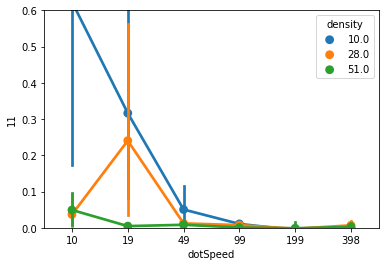

In [23]:
forward = temp[temp.direction=='forward']
nc=11
sns.pointplot(x='dotSpeed', y=str(nc), data=forward[forward.dotSize==2], hue='density')
# sns.pointplot(x='dotSpeed', y=str(nc), data=forward[forward.dotSize==2], hue='dotNum')
# sns.pointplot(x='dotSpeed', y=str(nc), data=forward[forward.dotSize==2])
plt.ylim(0,0.6)

(0, 0.6)

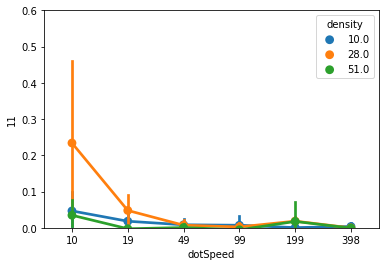

In [25]:
backward = temp[temp.direction=='backward']
nc=11
# sns.pointplot(x='dotSpeed', y=str(nc), data=backward, hue='dotNum')
sns.pointplot(x='dotSpeed', y=str(nc), data=backward[backward.dotSize==2], hue='density')
# sns.pointplot(x='dotSpeed', y=str(nc), data=backward[backward.dotSize==2])
plt.ylim(0,0.6)

(0, 0.8)

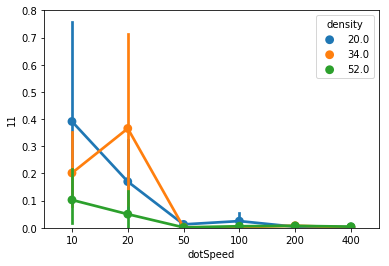

In [26]:
right = temp[temp.direction=='right']
nc=11
sns.pointplot(x='dotSpeed', y=str(nc), data=right, hue='density')
# sns.pointplot(x='dotSpeed', y=str(nc), data=backward[backward.dotSize==2], hue='dotNum')
# sns.pointplot(x='dotSpeed', y=str(nc), data=right[right.dotSize==2])
plt.ylim(0,0.8)

(0, 0.6)

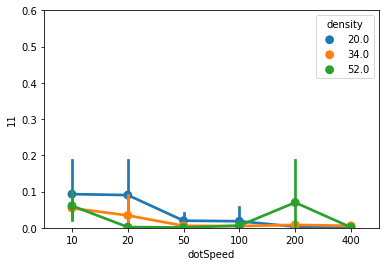

In [27]:
left = temp[temp.direction=='left']
nc=11
sns.pointplot(x='dotSpeed', y=str(nc), data=left, hue='density')
plt.ylim(0,0.6)

In [75]:
forward.condition.unique()

array([12, 38, 41, 66, 47, 49, 18, 24, 34, 29, 31, 35, 46, 45, 25, 53, 64,
       32, 71, 36, 50, 11, 48, 26, 63, 16, 39, 62, 44, 30,  4, 40, 52, 60,
       27, 69])

In [76]:
np.argmax(response[forward.condition.unique(),nc,0])

#peak speed for forward, all dotNum and dotSize together
#peak speed for forward, peak dotNum and peak dotSize



10

In [77]:
forward.condition.unique()[10]

31

In [82]:
print(response[31,nc,0])
print(response[31,nc,1])

0.6235237547230943
0.36292656108535915


In [83]:
np.trapz(response[forward.condition.unique(),nc,0])

1.4997997973585493

In [86]:
np.trapz(response[backward.condition.unique(),nc,0])

0.460652543849661

In [87]:
np.trapz(response[stim_table[stim_table.direction=='right'].condition.unique(),nc,0])

4.060083268632057

In [88]:
np.trapz(response[stim_table[stim_table.direction=='left'].condition.unique(),nc,0])

1.4331331941779264

In [105]:
metrics = pd.DataFrame(columns=('forward','backward','left','right','translation','rotation','right_left','for_back','trans_rot'), index=range(numbercells))
for nc in range(numbercells):
    forw = np.trapz(response[stim_table[stim_table.direction=='forward'].condition.unique(),nc,0])
    back = np.trapz(response[stim_table[stim_table.direction=='backward'].condition.unique(),nc,0])
    right = np.trapz(response[stim_table[stim_table.direction=='right'].condition.unique(),nc,0])
    left = np.trapz(response[stim_table[stim_table.direction=='left'].condition.unique(),nc,0])
    
    trans = np.trapz(response[stim_table[stim_table.motion=='translation'].condition.unique(),nc,0])
    rot = np.trapz(response[stim_table[stim_table.motion=='rotation'].condition.unique(),nc,0])
    
    right_left = (right-left)/(right+left)
    for_back = (forw-back)/(forw+back)
    trans_rot = (trans-rot)/(trans+rot)
    
    metrics.forward[nc] = forw
    metrics.backward[nc] = back
    metrics.left[nc] = left
    metrics.right[nc] = right
    metrics.translation[nc] = trans
    metrics.rotation[nc] = rot
    metrics.right_left[nc] = right_left
    metrics.for_back[nc] = for_back
    metrics.trans_rot[nc] = trans_rot

In [106]:
metrics

,forward,backward,left,right,translation,rotation,right_left,for_back,trans_rot
0,0.292535,0.389532,0.258921,0.280801,0.687268,0.544797,0.0405398,-0.14221,0.115636
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.180568,0.383162,0.212287,0.233885,0.582368,0.454411,0.0484071,-0.359381,0.123418
3,0.296949,0.41104,0.484626,0.329988,0.714131,0.812842,-0.189829,-0.161148,-0.0646451
4,0.277323,0.233455,0.309085,0.318185,0.522872,0.628189,0.0145066,0.0858832,-0.091496
5,0.178441,0.256862,0.298158,0.294049,0.442491,0.601018,-0.00693902,-0.180153,-0.151917
6,0.345236,0.266723,0.374352,0.47037,0.615135,0.853464,0.113668,0.128298,-0.162284
7,0.709526,0.468234,0.824183,0.923002,1.18205,1.75327,0.0565591,0.204873,-0.194601
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


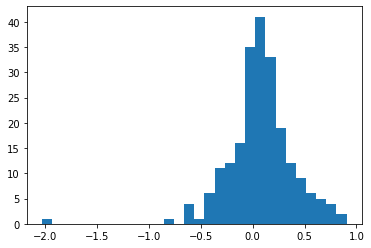

In [108]:
plt.hist(metrics.right_left, bins=30);

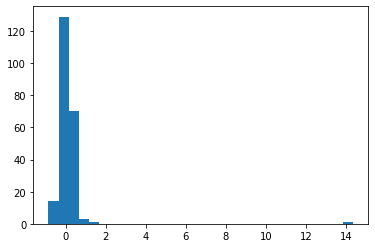

In [109]:
plt.hist(metrics.for_back, bins=30);

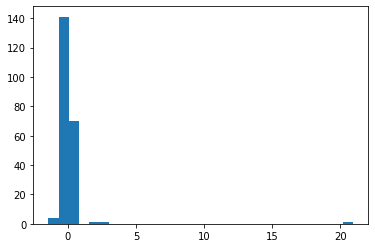

In [110]:
plt.hist(metrics.trans_rot, bins=30);

In [112]:
len(metrics[np.abs(metrics.trans_rot)>0.4])

35

In [114]:
len(metrics[np.abs(metrics.right_left)>0.4])

37

In [115]:
len(metrics[np.abs(metrics.trans_rot)>0.4])

35

In [120]:
##dot_expts = [925811299, 924800954, 924798910, 924134723, 924123771, 924113131, 924105376]

In [ ]:
925819695

In [10]:
dot_expts = [925172886, 925166866, 924667518, 924496653, 923803144, 923685768, 923531162,923201739]

In [32]:
for expt in dot_expts:
    filename = os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/analysis_files', str(expt)+'_analysis.h5')
    f = h5py.File(filename, 'r')
    response = f['response'][()]
    f.close()
    stim_table = pd.read_hdf(filename, 'stim_table')
    stim_table.rename(columns={'Unnamed: 0.1':'condition'}, inplace=True)
    stim_table['density'] = np.NaN
    stim_table.ix[stim_table.dotNum==300, 'density'] = 20
    stim_table.ix[stim_table.dotNum==545, 'density'] = 34
    stim_table.ix[stim_table.dotNum==1000, 'density'] = 52

    stim_table.ix[stim_table.dotNum==485, 'density'] = 10
    stim_table.ix[stim_table.dotNum==1184, 'density'] = 28
    stim_table.ix[stim_table.dotNum==2888, 'density'] = 51

    stim_table.ix[stim_table.dotNum==2258, 'density'] = 14
    stim_table.ix[stim_table.dotNum==5180, 'density'] = 26
    stim_table.ix[stim_table.dotNum==11882, 'density'] = 50
    numbercells = response.shape[1]
    
    metrics = pd.DataFrame(columns=('expt_id','forward','backward','left','right','translation','rotation','right_left','for_back','trans_rot'), index=range(numbercells))
    metrics['expt_id'] = expt
    for nc in range(numbercells):
        forw = np.trapz(response[stim_table[(stim_table.direction=='forward')&(stim_table.density<30)&(stim_table.dotSize>1)].condition.unique(),nc,0])
        back = np.trapz(response[stim_table[(stim_table.direction=='backward')&(stim_table.density<30)&(stim_table.dotSize>1)].condition.unique(),nc,0])
        right = np.trapz(response[stim_table[(stim_table.direction=='right')&(stim_table.density<30)&(stim_table.dotSize>5)].condition.unique(),nc,0])
        left = np.trapz(response[stim_table[(stim_table.direction=='left')&(stim_table.density<30)&(stim_table.dotSize>5)].condition.unique(),nc,0])

        trans = np.trapz(response[stim_table[(stim_table.motion=='translation')&(stim_table.density<30)&(stim_table.dotSize>1)].condition.unique(),nc,0])
        rot = np.trapz(response[stim_table[(stim_table.motion=='rotation')&(stim_table.density<30)&(stim_table.dotSize>5)].condition.unique(),nc,0])

        right_left = (right-left)/(right+left)
        for_back = (forw-back)/(forw+back)
        trans_rot = (trans-rot)/(trans+rot)

        metrics.forward[nc] = forw
        metrics.backward[nc] = back
        metrics.left[nc] = left
        metrics.right[nc] = right
        metrics.translation[nc] = trans
        metrics.rotation[nc] = rot
        metrics.right_left[nc] = right_left
        metrics.for_back[nc] = for_back
        metrics.trans_rot[nc] = trans_rot
    metrics.to_csv(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/metrics',str(expt)+'_dot_density.csv'))

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  #

In [33]:
metrics_all = pd.DataFrame(columns=('Unnamed: 0','expt_id','forward','backward','left','right','translation','rotation','right_left','for_back','trans_rot'))
for expt in dot_expts:
    metrics = pd.read_csv(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/metrics',str(expt)+'_dot_density.csv'))
    metrics_all = metrics_all.append(metrics)
    del(metrics)

In [34]:
metrics_all.head()

,Unnamed: 0,expt_id,forward,backward,left,right,translation,rotation,right_left,for_back,trans_rot
0,0,925172886,0.133708,0.501842,0.314067,0.444508,0.720529,0.794555,0.171955,-0.579238,-0.048860
1,1,925172886,0.190748,0.022923,0.054376,1.020605,0.218174,1.080484,0.898834,0.785437,-0.664001
2,2,925172886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,925172886,0.125733,0.163624,0.187519,0.316904,0.295163,0.517063,0.256500,-0.130948,-0.273201
4,4,925172886,0.087010,0.104295,0.097087,0.102993,0.197318,0.213068,0.029515,-0.090351,-0.038378


/Users/saskiad/anaconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/saskiad/anaconda2/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


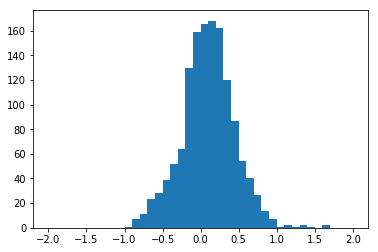

In [35]:
plt.hist(metrics_all.right_left, bins=40, range=(-2,2));

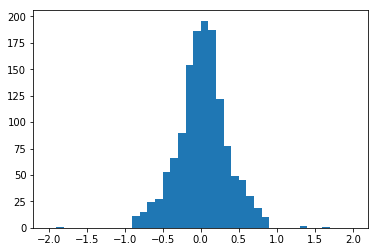

In [36]:
plt.hist(metrics_all.for_back, bins=40, range=(-2,2));

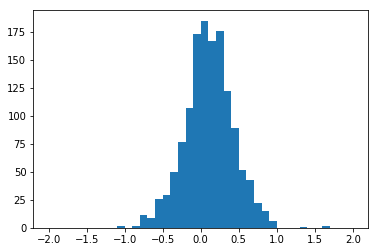

In [37]:
plt.hist(metrics_all.trans_rot, bins=40, range=(-2,2));

In [38]:
len(metrics_all[np.abs(metrics_all.trans_rot)>0.4])

315

In [39]:
len(metrics_all[np.abs(metrics_all.right_left)>0.4])

352

In [40]:
len(metrics_all[np.abs(metrics_all.for_back)>0.4])

294

In [41]:
len(metrics_all[np.isfinite(metrics_all.forward)])

1372

In [158]:
283/1372.

0.20626822157434402

(-3, 3)

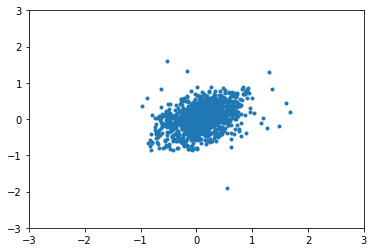

In [42]:
plt.plot(metrics_all.right_left, metrics_all.for_back, '.')
plt.xlim(-3,3)
plt.ylim(-3,3)

In [154]:
import scipy.stats as st

In [156]:
st.pearsonr(metrics_all.right_left.dropna(), metrics_all.for_back.dropna())

(0.05702697313908042, 0.034677678005647576)

In [11]:
dot_areas = ['VISl', 'VISal', 'VISpm', 'VISam', 'VISpm', 'VISam', 'VISl','VISal']

In [45]:
metrics_all.rename(columns={'expt_id':'session_id'}, inplace=True)

In [46]:
metrics_all['area'] = np.NaN
for i,expt in enumerate(dot_expts):
    metrics_all.ix[metrics_all.session_id==expt, 'area']=dot_areas[i]

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
for a in metrics_all.area.unique():
    temp = metrics_all[(metrics_all.area==a)&np.isfinite(metrics_all.forward)]
    print(a, len(temp))
    print(100*len(temp[np.abs(temp.trans_rot)>0.4])/float(len(temp)))
    print(100*len(temp[np.abs(temp.right_left)>0.4])/float(len(temp)))
    print(100*len(temp[np.abs(temp.for_back)>0.4])/float(len(temp)))

VISl 333
26.726726726726728
28.22822822822823
28.82882882882883
VISal 334
19.161676646706585
14.071856287425149
17.365269461077844
VISpm 408
16.91176470588235
21.323529411764707
18.38235294117647
VISam 297
20.53872053872054
11.447811447811448
18.855218855218855


Text(0, 0.5, 'Percent of neurons (all ROIS)')

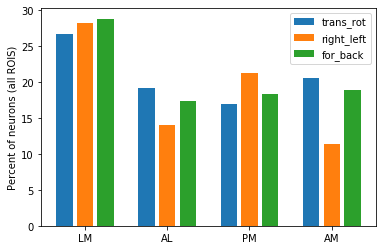

In [184]:
plt.bar(np.arange(0,4,1.), [26.73,19.16,16.91,20.54], width=0.2, label='trans_rot')
plt.bar(np.arange(0.25,4,1.), [28.23,14.07,21.32,11.45], width=0.2, label='right_left')
plt.bar(np.arange(0.5,4,1.), [28.83,17.37,18.38,18.86], width=0.2, label='for_back')
plt.legend()
plt.xticks(np.arange(0.25, 4, 1.), ['LM','AL','PM','AM'])
plt.ylabel("Percent of neurons (all ROIS)" )

In [194]:
for a in metrics_all.area.unique():
    temp = metrics_all[(metrics_all.area==a)&np.isfinite(metrics_all.forward)]
    print(a, len(temp), 'neurons')
    print('translation:', np.round(100*len(temp[temp.trans_rot>0.4])/float(len(temp)), 2))
    print('rotation:', np.round(100*len(temp[temp.trans_rot<-0.4])/float(len(temp)),2))
    print('right:', np.round(100*len(temp[temp.right_left>0.4])/float(len(temp)),2))
    print('left:', np.round(100*len(temp[temp.right_left<-0.4])/float(len(temp)),2))
    print('forward:', np.round(100*len(temp[temp.for_back>0.4])/float(len(temp)),2))
    print('backward:', np.round(100*len(temp[temp.for_back<-0.4])/float(len(temp)),2))
    print()

VISl 333 neurons
translation: 3.0
rotation: 23.72
right: 16.82
left: 11.41
forward: 15.32
backward: 13.51

VISal 334 neurons
translation: 10.78
rotation: 8.38
right: 7.49
left: 6.59
forward: 6.89
backward: 10.48

VISpm 408 neurons
translation: 8.82
rotation: 8.09
right: 17.16
left: 4.17
forward: 14.46
backward: 3.92

VISam 297 neurons
translation: 5.05
rotation: 15.49
right: 8.08
left: 3.37
forward: 9.76
backward: 9.09



In [67]:
areas = ['VISl','VISal','VISpm','VISam']

In [196]:
a = 'VISl'

In [197]:
temp = metrics_all[(metrics_all.area==a)&np.isfinite(metrics_all.forward)]

In [198]:
len(temp)

333

In [200]:
len(metrics_all.expt_id.unique())

8

In [201]:
metrics_per_expt = pd.DataFrame(columns=('expt_id','area','translation','rotation','left','right','forward','backward'), index=range(8))

In [203]:
for i,expt in enumerate(metrics_all.expt_id.unique()):
    metrics_per_expt.expt_id.loc[i] = expt
    temp = metrics_all[(metrics_all.expt_id==expt)&np.isfinite(metrics_all.forward)]
    metrics_per_expt.area.loc[i] = temp.area.iloc[0]
    metrics_per_expt.translation.loc[i] = 100*len(temp[temp.trans_rot>0.4])/float(len(temp))
    metrics_per_expt.rotation.loc[i] = 100*len(temp[temp.trans_rot<-0.4])/float(len(temp))
    metrics_per_expt.right.loc[i] = 100*len(temp[temp.right_left>0.4])/float(len(temp))
    metrics_per_expt.left.loc[i] = 100*len(temp[temp.right_left<-0.4])/float(len(temp))
    metrics_per_expt.forward.loc[i] = 100*len(temp[temp.for_back>0.4])/float(len(temp))
    metrics_per_expt.backward.loc[i] = 100*len(temp[temp.for_back<-0.4])/float(len(temp))
    

/Users/saskiad/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [204]:
metrics_per_expt

,expt_id,area,translation,rotation,left,right,forward,backward
0,925172886,VISl,2.91971,32.1168,13.1387,16.7883,16.7883,13.1387
1,925166866,VISal,10.2273,11.3636,6.81818,7.38636,6.81818,10.2273
2,924667518,VISpm,9.47368,8.94737,3.15789,22.6316,18.9474,3.15789
3,924496653,VISam,5.55556,15.2778,2.08333,9.02778,7.63889,4.86111
4,923803144,VISpm,8.25688,7.33945,5.04587,12.3853,10.5505,4.58716
5,923685768,VISam,4.57516,15.6863,4.57516,7.18954,11.7647,13.0719
6,923531162,VISl,3.06122,17.8571,10.2041,16.8367,14.2857,13.7755
7,923201739,VISal,11.3924,5.06329,6.32911,7.59494,6.96203,10.7595


Text(4.5, 26, 'AM')

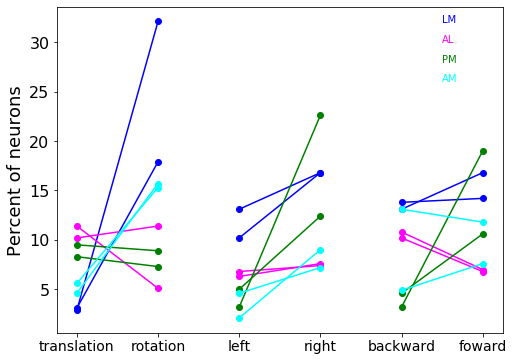

In [222]:
plt.figure(figsize=(8,6))

plt.plot([0,1],[2.9,32.1], 'o-', color='blue')
plt.plot([0,1],[3.1, 17.9], 'o-', color='blue')
plt.plot([0,1], [10.2, 11.4], 'o-', color='magenta')
plt.plot([0,1], [11.4, 5.1], 'o-', color='magenta')
plt.plot([0,1], [9.5, 8.9], 'o-', color='green')
plt.plot([0,1], [8.3, 7.3], 'o-', color='green')
plt.plot([0,1], [5.6, 15.3], 'o-', color='cyan')
plt.plot([0,1], [4.6, 15.7], 'o-', color='cyan')

plt.plot([2,3],[13.1,16.8], 'o-', color='blue')
plt.plot([2,3],[10.2,16.8], 'o-', color='blue')
plt.plot([2,3], [6.8,7.4], 'o-', color='magenta')
plt.plot([2,3], [6.3,7.6], 'o-', color='magenta')
plt.plot([2,3], [3.2, 22.6], 'o-', color='green')
plt.plot([2,3], [5.0, 12.4], 'o-', color='green')
plt.plot([2,3], [2.1, 9.0], 'o-', color='cyan')
plt.plot([2,3], [4.6, 7.2], 'o-', color='cyan')

plt.plot([4,5],[13.1,16.8], 'o-', color='blue')
plt.plot([4,5],[13.8, 14.2], 'o-', color='blue')
plt.plot([4,5], [10.2, 6.8], 'o-', color='magenta')
plt.plot([4,5], [10.8, 7.0], 'o-', color='magenta')
plt.plot([4,5], [3.2, 19.0], 'o-', color='green')
plt.plot([4,5], [4.6, 10.6], 'o-', color='green')
plt.plot([4,5], [4.9, 7.6], 'o-', color='cyan')
plt.plot([4,5], [13.1, 11.8], 'o-', color='cyan')

plt.tick_params(labelsize=16)
plt.xticks(range(6), ['translation','rotation','left','right','backward','foward'], fontsize=14)
plt.ylabel("Percent of neurons", fontsize=18)


plt.text(4.5,32, 'LM', color='blue')
plt.text(4.5,30, 'AL', color='magenta')
plt.text(4.5,28, 'PM', color='green')
plt.text(4.5,26, 'AM', color='cyan')

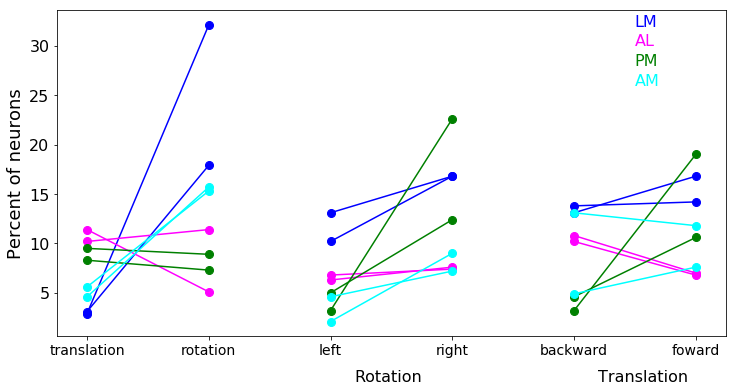

In [22]:
fig = plt.figure(figsize=(12,6))

plt.plot([0,1],[2.9,32.1], 'o-', color='blue', markersize=8)
plt.plot([0,1],[3.1, 17.9], 'o-', color='blue', markersize=8)
plt.plot([0,1], [10.2, 11.4], 'o-', color='magenta', markersize=8)
plt.plot([0,1], [11.4, 5.1], 'o-', color='magenta', markersize=8)
plt.plot([0,1], [9.5, 8.9], 'o-', color='green', markersize=8)
plt.plot([0,1], [8.3, 7.3], 'o-', color='green', markersize=8)
plt.plot([0,1], [5.6, 15.3], 'o-', color='cyan', markersize=8)
plt.plot([0,1], [4.6, 15.7], 'o-', color='cyan', markersize=8)

plt.plot([2,3],[13.1,16.8], 'o-', color='blue', markersize=8)
plt.plot([2,3],[10.2,16.8], 'o-', color='blue', markersize=8)
plt.plot([2,3], [6.8,7.4], 'o-', color='magenta', markersize=8)
plt.plot([2,3], [6.3,7.6], 'o-', color='magenta', markersize=8)
plt.plot([2,3], [3.2, 22.6], 'o-', color='green', markersize=8)
plt.plot([2,3], [5.0, 12.4], 'o-', color='green', markersize=8)
plt.plot([2,3], [2.1, 9.0], 'o-', color='cyan', markersize=8)
plt.plot([2,3], [4.6, 7.2], 'o-', color='cyan', markersize=8)

plt.plot([4,5],[13.1,16.8], 'o-', color='blue', markersize=8)
plt.plot([4,5],[13.8, 14.2], 'o-', color='blue', markersize=8)
plt.plot([4,5], [10.2, 6.8], 'o-', color='magenta', markersize=8)
plt.plot([4,5], [10.8, 7.0], 'o-', color='magenta', markersize=8)
plt.plot([4,5], [3.2, 19.0], 'o-', color='green', markersize=8)
plt.plot([4,5], [4.6, 10.6], 'o-', color='green', markersize=8)
plt.plot([4,5], [4.9, 7.6], 'o-', color='cyan', markersize=8)
plt.plot([4,5], [13.1, 11.8], 'o-', color='cyan', markersize=8)

plt.tick_params(labelsize=16)
plt.xticks(range(6), ['translation','rotation','left','right','backward','foward'], fontsize=14)
plt.ylabel("Percent of neurons", fontsize=18)



plt.text(4.5,32, 'LM', color='blue', fontsize=16)
plt.text(4.5,30, 'AL', color='magenta', fontsize=16)
plt.text(4.5,28, 'PM', color='green', fontsize=16)
plt.text(4.5,26, 'AM', color='cyan', fontsize=16)

plt.text(2.2, -4, 'Rotation', fontsize=16)
plt.text(4.2, -4, 'Translation', fontsize=16)

figname = r'/Users/saskiad/Dropbox/Openscope Motion/dot_summary'
mp.save_figure(fig, figname)

In [21]:
import sys
sys.path.append(r'/Users/saskiad/code/visual_coding_2p_analysis/visual_coding_2p_analysis')
import metric_plot as mp

In [45]:
## example plots

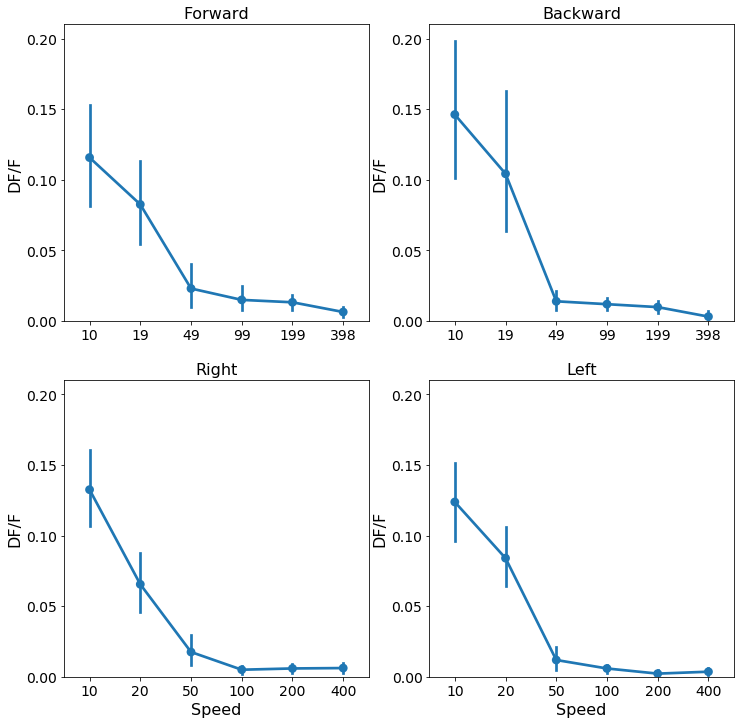

In [80]:
nc=53
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
forward = temp[temp.direction=='forward']
sns.pointplot(x='dotSpeed', y=str(nc), data=forward)
plt.ylim(0,0.21)
plt.ylabel("DF/F", fontsize=16)
plt.xlabel("")
plt.title("Forward", fontsize=16)
plt.yticks([0,0.05,0.1,0.15, 0.2])
plt.tick_params(labelsize=14)
plt.subplot(2,2,2)
forward = temp[temp.direction=='backward']
sns.pointplot(x='dotSpeed', y=str(nc), data=forward)
plt.ylim(0,0.21)
plt.ylabel("DF/F", fontsize=16)
plt.xlabel("")
plt.title("Backward", fontsize=16)
plt.yticks([0,0.05,0.1,0.15, 0.2])
plt.tick_params(labelsize=14)
plt.subplot(2,2,3)
forward = temp[temp.direction=='right']
sns.pointplot(x='dotSpeed', y=str(nc), data=forward)
plt.ylim(0,0.21)
plt.ylabel("DF/F", fontsize=16)
plt.title("Right", fontsize=16)
plt.yticks([0,0.05,0.1,0.15, 0.2])
plt.xlabel("Speed", fontsize=16)
plt.tick_params(labelsize=14)
plt.subplot(2,2,4)
forward = temp[temp.direction=='left']
sns.pointplot(x='dotSpeed', y=str(nc), data=forward)
plt.ylim(0,0.21)
plt.ylabel("DF/F", fontsize=16)
plt.title("Left", fontsize=16)
plt.xlabel("Speed", fontsize=16)
plt.yticks([0,0.05,0.1,0.15, 0.2])
plt.tick_params(labelsize=14)

figname = r'/Users/saskiad/Dropbox/Openscope Motion/example_cell_'+str(nc)
mp.save_figure(fig, figname)

In [66]:
filename

'/Users/saskiad/Dropbox/Openscope Motion/analysis_files/923803144_analysis.h5'

In [82]:
metrics_all.head()

,Unnamed: 0,expt_id,forward,backward,left,right,translation,rotation,right_left,for_back,trans_rot
0,0,925172886,0.254571,0.857128,0.919765,1.163814,1.117784,2.084889,0.117130,-0.542014,-0.301968
1,1,925172886,0.354203,0.029150,0.129619,3.484221,0.388913,3.615734,0.928265,0.847921,-0.805769
2,2,925172886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,925172886,0.251521,0.393233,0.714195,1.119500,0.644646,1.849131,0.221032,-0.219793,-0.482996
4,4,925172886,0.211861,0.252659,0.703386,0.495186,0.468264,1.246696,-0.173707,-0.087829,-0.453907


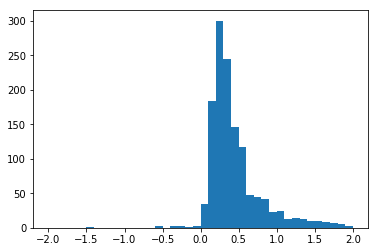

In [85]:
plt.hist(metrics_all.forward, bins=40, range=(-2,2));

In [86]:
len(metrics_all)

1572

In [128]:
530/1572.

0.3371501272264631

In [124]:
print(len(metrics_all[(metrics_all.forward>0.85)|(metrics_all.backward>0.85)]))

329


In [125]:
print(len(metrics_all[(metrics_all.left>0.85)|(metrics_all.right>0.85)]))

393


In [127]:
print(len(metrics_all[(metrics_all.forward>0.85)|(metrics_all.backward>0.85)|(metrics_all.left>0.85)|(metrics_all.right>0.85)]))

530


In [100]:
len(stim_table[stim_table.direction=='left'])

540

In [96]:
.01*360

3.6

In [104]:
len(metrics_all[np.abs(metrics_all.trans_rot)>0.4])

283

In [105]:
len(metrics_all[(np.abs(metrics_all.trans_rot)>0.4)&(metrics_all.translation>1)&(metrics_all.rotation>1)])

51

In [106]:
len(metrics_all[(np.abs(metrics_all.trans_rot)>0.4)])

283

In [122]:
session_id = 923803144
metrics_all[metrics_all.expt_id==session_id].loc[53]

Unnamed: 0             53
expt_id         923803144
forward           1.46116
backward          1.60251
left              2.08031
right             2.08541
translation       3.13754
rotation          4.17525
right_left     0.00122378
for_back       -0.0461359
trans_rot       -0.141904
Name: 53, dtype: object

In [112]:
(1.46-1.6)/(1.46+1.6)

-0.04575163398692814

### roi tables

In [130]:
roi_table = pd.read_csv(r'/Users/saskiad/Dropbox/Openscope Motion/roi_tables/923803144_rois.csv')

In [131]:
len(roi_table)

250

In [134]:
len(roi_table[roi_table.valid])

170

In [135]:
170/250.

0.68

In [137]:
roi_table.head()

,Unnamed: 0,exclude_code,exclusion_labels,mask_page,mask,height,width,valid,y,x,session_id
0,0,2,"[u'motion_border', u'boundary']",0,"[[False, False, False, False, False, True, Tru...",13,18,False,2,99,923803144
1,1,0,[],0,"[[False, False, False, False, False, True, Tru...",14,14,True,27,214,923803144
2,2,11,[u'apical_dendrite'],0,"[[False, False, False, False, False, False, Fa...",16,24,False,308,155,923803144
3,3,0,[],0,"[[False, False, False, False, False, True, Tru...",14,22,True,313,216,923803144
4,4,0,[],0,"[[False, False, False, False, False, False, Tr...",16,17,True,313,447,923803144


In [47]:
rois = pd.DataFrame(columns=('exclude_code','exclusion_labels','mask_page','mask','height','width','valid','y','x','session_id'))

In [48]:
for f in os.listdir(r'/Users/saskiad/Dropbox/Openscope Motion/roi_tables'):
    temp = pd.read_csv(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/roi_tables',f))
    rois = rois.append(temp)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [ ]:
for f in os.listdir(r'/Users/saskiad/Dropbox/Openscope Motion/roi_tables'):

In [142]:
len(rois)

4389

In [143]:
len(metrics_all)

1572

In [144]:
rois.session_id.unique()

array([919853170, 918424568, 923803144, 924496653, 928686238, 919634397,
       923201739, 927781186, 923531162, 918719340, 925172886, 927281206,
       923685768, 927591593, 917552587, 924667518, 925166866, 926684589,
       917456401, 918097749, 918720159], dtype=object)

In [151]:
metrics_all.session_id.unique()

array([925172886, 925166866, 924667518, 924496653, 923803144, 923685768,
       923531162, 923201739], dtype=object)

In [152]:
for expt in metrics_all.session_id.unique():
    if expt in rois.session_id.unique():
        print('here')
    else:
        print(expt)
        

here
here
here
here
here
here
here
here


In [147]:
metrics_all.rename(columns={'expt_id':'session_id'}, inplace=True)

In [49]:
rois.rename(columns={'Unnamed: 0':'cell_id'}, inplace=True)

In [50]:
metrics_all.rename(columns={'Unnamed: 0':'cell_id'}, inplace=True)
# rois.rename(columns={'Unnamed: 0':'cell_id'}, inplace=True)

In [51]:
temp = pd.merge(metrics_all, rois, on=('session_id','cell_id'), how='left')

In [52]:
len(temp)

1572

In [150]:
len(metrics_all)

1572

In [53]:
len(temp[temp.valid])

1116

In [161]:
1116/1572.

0.7099236641221374

In [165]:
208/1116.

0.1863799283154122

In [54]:
valid = temp[temp.valid]

## Redoing numbers

In [60]:
valid.iloc[2]

cell_id                                                             6
session_id                                                  925172886
forward                                                      0.224346
backward                                                     0.160101
left                                                          0.21263
right                                                        0.176046
translation                                                   0.39003
rotation                                                     0.402354
right_left                                                 -0.0941243
for_back                                                      0.16711
trans_rot                                                  -0.0155538
area                                                             VISl
exclude_code                                                        0
exclusion_labels                                                   []
height              

In [64]:
print(len(valid[(valid.forward>0.3)|(valid.backward>0.3)]))

264


In [65]:
print(len(valid[(valid.right>0.3)|(valid.left>0.3)]))

185


In [66]:
print(len(valid[(valid.right>0.3)|(valid.left>0.3)|(valid.forward>0.3)|(valid.backward>0.3)]))

340


In [357]:
len(valid)

1116

In [175]:
383./len(valid)

0.3431899641577061

In [360]:
#all densities
for a in areas:
    print(len(valid[(valid.area==a)&((valid.right>0.85)|(valid.left>0.85)|(valid.forward>0.85)|(valid.backward>0.85))]))
    print len(valid[valid.area==a])

123
281
104
276
103
319
53
240


In [363]:
print areas[0], 123/281.
print areas[1], 104/276.
print areas[2], 103/319.
print areas[3], 53/240.

VISl 0.437722419929
VISal 0.376811594203
VISpm 0.322884012539
VISam 0.220833333333


In [69]:
for a in areas:
    print(len(valid[(valid.area==a)&((valid.right>0.3)|(valid.left>0.3)|(valid.forward>0.3)|(valid.backward>0.3))]))
    print len(valid[valid.area==a])

116
281
74
276
107
319
43
240


In [70]:
print areas[0], 116/281.
print areas[1], 74/276.
print areas[2], 107/319.
print areas[3], 43/240.

VISl 0.4128113879
VISal 0.268115942029
VISpm 0.335423197492
VISam 0.179166666667


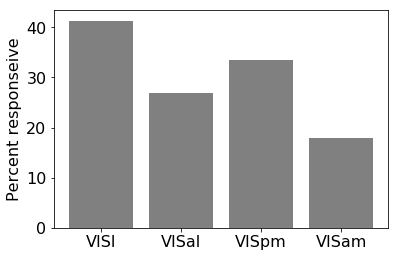

In [71]:
# plt.bar(range(4), [43.8, 37.7, 32.3, 22.1], color='gray')
plt.bar(range(4), [41.3, 26.8, 33.5, 17.9], color='gray')
plt.xticks(range(4), areas, fontsize=16);
plt.ylabel("Percent responseive", fontsize=16)
plt.tick_params(labelsize=16)

In [176]:
len(valid[(np.abs(valid.for_back)>0.4)&((valid.forward>0.85)|(valid.backward>0.85))])

118

In [183]:
print(len(valid[(valid.for_back>0.4)&(valid.forward>0.85)]))
print(len(valid[(valid.for_back<-0.4)&(valid.backward>0.85)]))

58
60


In [178]:
118/242.

0.48760330578512395

In [177]:
len(valid[(np.abs(valid.right_left)>0.4)&((valid.right>0.85)|(valid.left>0.85))])

120

In [181]:
print(len(valid[(valid.right_left>0.4)&(valid.right>0.85)]))
print(len(valid[(valid.right_left<-0.4)&(valid.left>0.85)]))

71
49


In [179]:
120/285.

0.42105263157894735

In [172]:
len(valid[(np.abs(valid.trans_rot)>0.4)])

198

In [191]:
len(valid[(valid.right>0.85)&(valid.forward>0.85)&(np.abs(valid.trans_rot)<0.4)])

85

In [189]:
len(valid[(valid.left>0.85)&(valid.backward>0.85)&(np.abs(valid.trans_rot)<0.4)])

70

In [200]:
valid['area'] = np.NaN
for i,expt in enumerate(dot_expts):
    valid.ix[valid.session_id==expt, 'area']=dot_areas[i]

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
dot_expts

[925172886,
 925166866,
 924667518,
 924496653,
 923803144,
 923685768,
 923531162,
 923201739]

In [72]:
dot_areas

['VISl', 'VISal', 'VISpm', 'VISam', 'VISpm', 'VISam', 'VISl', 'VISal']

In [373]:
metrics_per_expt_valid = pd.DataFrame(columns=('expt_id','area','translation','rotation','left','right','forward','backward'), index=range(8))
for i,expt in enumerate(valid.session_id.unique()):
    metrics_per_expt_valid.expt_id.loc[i] = expt
#     temp = valid[(valid.session_id==expt)&np.isfinite(valid.forward)]
    temp = valid[(valid.session_id==expt)&np.isfinite(valid.forward)&((valid.right>0.85)|(valid.left>0.85)|(valid.forward>0.85)|(valid.backward>0.85))]
    metrics_per_expt_valid.area.loc[i] = temp.area.iloc[0]
    metrics_per_expt_valid.translation.loc[i] = 100*len(temp[temp.trans_rot>0.4])/float(len(temp))
    metrics_per_expt_valid.rotation.loc[i] = 100*len(temp[temp.trans_rot<-0.4])/float(len(temp))
    metrics_per_expt_valid.right.loc[i] = 100*len(temp[temp.right_left>0.4])/float(len(temp))
    metrics_per_expt_valid.left.loc[i] = 100*len(temp[temp.right_left<-0.4])/float(len(temp))
    metrics_per_expt_valid.forward.loc[i] = 100*len(temp[temp.for_back>0.4])/float(len(temp))
    metrics_per_expt_valid.backward.loc[i] = 100*len(temp[temp.for_back<-0.4])/float(len(temp))
    

In [374]:
metrics_per_expt_valid

,expt_id,area,translation,rotation,left,right,forward,backward
0,925172886,VISl,4.7619,45.2381,21.4286,33.3333,35.7143,16.6667
1,925166866,VISal,18.5185,16.6667,14.8148,14.8148,11.1111,20.3704
2,924667518,VISpm,13.6364,22.7273,0,29.5455,25,4.54545
3,924496653,VISam,15,35,5,15,20,10
4,923803144,VISpm,13.5593,13.5593,11.8644,22.0339,13.5593,8.47458
5,923685768,VISam,15.1515,18.1818,9.09091,12.1212,21.2121,12.1212
6,923531162,VISl,4.93827,24.6914,18.5185,25.9259,20.9877,27.1605
7,923201739,VISal,26,14,16,10,10,24


Text(4.5,38,'AM')

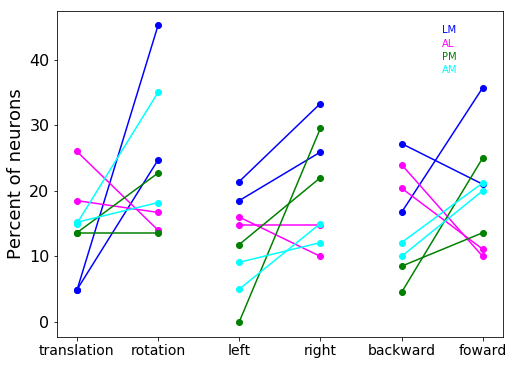

In [378]:
#with the 0.85 criteria
plt.figure(figsize=(8,6))

#translation rotation
plt.plot([0,1],[4.8, 45.2], 'o-', color='blue')
plt.plot([0,1],[4.9, 24.7], 'o-', color='blue')
plt.plot([0,1], [18.5, 16.7], 'o-', color='magenta')
plt.plot([0,1], [26, 14], 'o-', color='magenta')
plt.plot([0,1], [13.6, 22.7], 'o-', color='green')
plt.plot([0,1], [13.6, 13.6], 'o-', color='green')
plt.plot([0,1], [15, 35], 'o-', color='cyan')
plt.plot([0,1], [15.2, 18.2], 'o-', color='cyan')

#left right
plt.plot([2,3],[21.4, 33.3], 'o-', color='blue')
plt.plot([2,3],[18.5, 25.9], 'o-', color='blue')
plt.plot([2,3], [14.8, 14.8], 'o-', color='magenta')
plt.plot([2,3], [16, 10], 'o-', color='magenta')
plt.plot([2,3], [0, 29.5], 'o-', color='green')
plt.plot([2,3], [11.8, 22.0], 'o-', color='green')
plt.plot([2,3], [5, 15], 'o-', color='cyan')
plt.plot([2,3], [9.1, 12.1], 'o-', color='cyan')

#backward forward
plt.plot([4,5],[16.7, 35.7], 'o-', color='blue')
plt.plot([4,5],[27.2, 21.0], 'o-', color='blue')
plt.plot([4,5], [20.4, 11.1], 'o-', color='magenta')
plt.plot([4,5], [24, 10], 'o-', color='magenta')
plt.plot([4,5], [4.5, 25], 'o-', color='green')
plt.plot([4,5], [8.5, 13.6], 'o-', color='green')
plt.plot([4,5], [10,20], 'o-', color='cyan')
plt.plot([4,5], [12.1, 21.2], 'o-', color='cyan')

plt.tick_params(labelsize=16)
plt.xticks(range(6), ['translation','rotation','left','right','backward','foward'], fontsize=14)
plt.ylabel("Percent of neurons", fontsize=18)


plt.text(4.5,44, 'LM', color='blue')
plt.text(4.5,42, 'AL', color='magenta')
plt.text(4.5,40, 'PM', color='green')
plt.text(4.5,38, 'AM', color='cyan')

In [204]:
metrics_per_expt_valid #without the 0.85 criteria

,expt_id,area,translation,rotation,left,right,forward,backward
0,925172886,VISl,1.96078,27.451,11.7647,16.6667,19.6078,9.80392
1,925166866,VISal,10.1562,10.1562,7.03125,7.8125,6.25,10.9375
2,924667518,VISpm,7.5188,10.5263,3.00752,21.8045,19.5489,2.25564
3,924496653,VISam,6.52174,15.2174,1.08696,7.6087,6.52174,6.52174
4,923803144,VISpm,6.62252,7.28477,5.29801,15.2318,8.60927,4.63576
5,923685768,VISam,4.46429,16.9643,5.35714,8.92857,13.3929,12.5
6,923531162,VISl,2.66667,18,11.3333,18,13.3333,15.3333
7,923201739,VISal,11.9658,6.83761,8.54701,7.69231,7.69231,11.9658


Text(4.5,24,'AM')

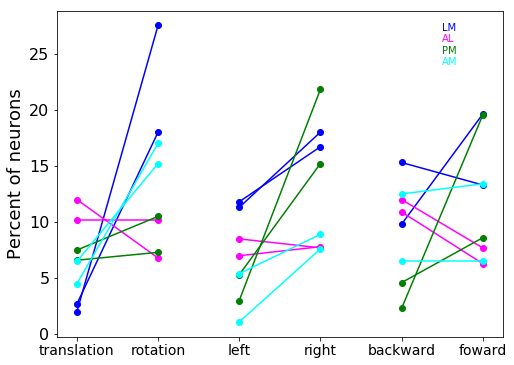

In [209]:
plt.figure(figsize=(8,6))

plt.plot([0,1],[2.0,27.5], 'o-', color='blue')
plt.plot([0,1],[2.7, 18.0], 'o-', color='blue')
plt.plot([0,1], [10.2, 10.2], 'o-', color='magenta')
plt.plot([0,1], [12.0, 6.8], 'o-', color='magenta')
plt.plot([0,1], [7.5, 10.5], 'o-', color='green')
plt.plot([0,1], [6.6, 7.3], 'o-', color='green')
plt.plot([0,1], [6.5, 15.2], 'o-', color='cyan')
plt.plot([0,1], [4.5, 17.0], 'o-', color='cyan')

plt.plot([2,3],[11.8,16.7], 'o-', color='blue')
plt.plot([2,3],[11.3,18.0], 'o-', color='blue')
plt.plot([2,3], [7.0, 7.8], 'o-', color='magenta')
plt.plot([2,3], [8.5, 7.7], 'o-', color='magenta')
plt.plot([2,3], [3.0, 21.8], 'o-', color='green')
plt.plot([2,3], [5.3, 15.2], 'o-', color='green')
plt.plot([2,3], [1.1, 7.6], 'o-', color='cyan')
plt.plot([2,3], [5.4, 8.9], 'o-', color='cyan')

plt.plot([4,5],[9.8,19.6], 'o-', color='blue')
plt.plot([4,5],[15.3, 13.3], 'o-', color='blue')
plt.plot([4,5], [10.9, 6.3], 'o-', color='magenta')
plt.plot([4,5], [12.0, 7.7], 'o-', color='magenta')
plt.plot([4,5], [2.3, 19.5], 'o-', color='green')
plt.plot([4,5], [4.6, 8.6], 'o-', color='green')
plt.plot([4,5], [6.5, 6.5], 'o-', color='cyan')
plt.plot([4,5], [12.5, 13.4], 'o-', color='cyan')

plt.tick_params(labelsize=16)
plt.xticks(range(6), ['translation','rotation','left','right','backward','foward'], fontsize=14)
plt.ylabel("Percent of neurons", fontsize=18)


plt.text(4.5,27, 'LM', color='blue')
plt.text(4.5,26, 'AL', color='magenta')
plt.text(4.5,25, 'PM', color='green')
plt.text(4.5,24, 'AM', color='cyan')

(0, 10)

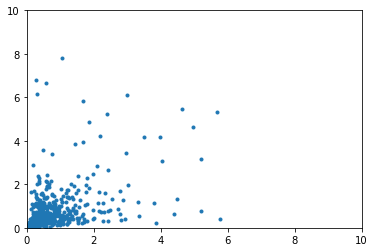

In [370]:
plt.plot(speed_valid.forward, speed_valid.backward, '.')
plt.xlim(0,10)
plt.ylim(0,10)

In [385]:
temp = valid[(valid.area=='VISl')&np.isfinite(valid.forward)&((valid.right>0.85)|(valid.left>0.85)|(valid.forward>0.85)|(valid.backward>0.85))]
temp2 = valid[(valid.area=='VISal')&np.isfinite(valid.forward)&((valid.right>0.85)|(valid.left>0.85)|(valid.forward>0.85)|(valid.backward>0.85))]

In [388]:
temp2[['forward','backward','left','right']].head()

,forward,backward,left,right
163,0.345178,0.985028,0.637096,0.644327
171,0.568181,0.552405,1.208724,0.721471
174,1.779793,1.662635,6.158609,2.472300
178,0.591036,1.424237,1.978660,0.897233
180,1.187572,1.715440,0.576710,0.532276


In [76]:
metrics_per_expt_density = pd.DataFrame(columns=('session_id','area','translation','rotation','left','right','forward','backward'), index=range(8))
for i,expt in enumerate(valid.session_id.unique()):
    metrics_per_expt_density.session_id.loc[i] = expt
#     temp = valid[(valid.session_id==expt)&np.isfinite(valid.forward)]
    temp = valid[(valid.session_id==expt)&np.isfinite(valid.forward)&((valid.right>0.3)|(valid.left>0.3)|(valid.forward>0.3)|(valid.backward>0.3))]
    metrics_per_expt_density.area.loc[i] = temp.area.iloc[0]
    metrics_per_expt_density.translation.loc[i] = 100*len(temp[temp.trans_rot>0.4])/float(len(temp))
    metrics_per_expt_density.rotation.loc[i] = 100*len(temp[temp.trans_rot<-0.4])/float(len(temp))
    metrics_per_expt_density.right.loc[i] = 100*len(temp[temp.right_left>0.4])/float(len(temp))
    metrics_per_expt_density.left.loc[i] = 100*len(temp[temp.right_left<-0.4])/float(len(temp))
    metrics_per_expt_density.forward.loc[i] = 100*len(temp[temp.for_back>0.4])/float(len(temp))
    metrics_per_expt_density.backward.loc[i] = 100*len(temp[temp.for_back<-0.4])/float(len(temp))
    

In [77]:
metrics_per_expt_density

,session_id,area,translation,rotation,left,right,forward,backward
0,925172886,VISl,20.5128,33.3333,20.5128,25.641,28.2051,17.9487
1,925166866,VISal,36.8421,7.89474,13.1579,13.1579,7.89474,31.5789
2,924667518,VISpm,31.8182,11.3636,4.54545,31.8182,22.7273,4.54545
3,924496653,VISam,33.3333,20,6.66667,26.6667,6.66667,6.66667
4,923803144,VISpm,46.0317,6.34921,12.6984,17.4603,22.2222,11.1111
5,923685768,VISam,14.2857,7.14286,14.2857,10.7143,28.5714,17.8571
6,923531162,VISl,18.1818,11.6883,18.1818,25.974,27.2727,28.5714
7,923201739,VISal,52.7778,5.55556,16.6667,13.8889,13.8889,16.6667


Text(4.5,24,'AM')

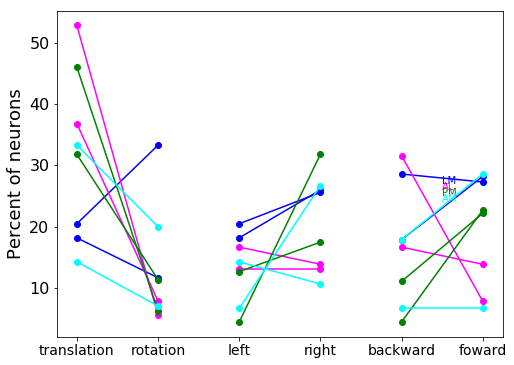

In [80]:
#low density/big dot size only
plt.figure(figsize=(8,6))

plt.plot([0,1],[20.5, 33.3], 'o-', color='blue')
plt.plot([0,1],[18.2, 11.7], 'o-', color='blue')
plt.plot([0,1], [36.8, 7.9], 'o-', color='magenta')
plt.plot([0,1], [52.8, 5.6], 'o-', color='magenta')
plt.plot([0,1], [31.8, 11.4], 'o-', color='green')
plt.plot([0,1], [46.0, 6.3], 'o-', color='green')
plt.plot([0,1], [33.3, 20], 'o-', color='cyan')
plt.plot([0,1], [14.3, 7.1], 'o-', color='cyan')

plt.plot([2,3],[20.5, 25.6], 'o-', color='blue')
plt.plot([2,3],[18.2, 26.0], 'o-', color='blue')
plt.plot([2,3], [13.2, 13.2], 'o-', color='magenta')
plt.plot([2,3], [16.7, 13.9], 'o-', color='magenta')
plt.plot([2,3], [4.5, 31.8], 'o-', color='green')
plt.plot([2,3], [12.7, 17.5], 'o-', color='green')
plt.plot([2,3], [6.7, 26.7], 'o-', color='cyan')
plt.plot([2,3], [14.3, 10.7], 'o-', color='cyan')

plt.plot([4,5],[17.9, 28.2], 'o-', color='blue')
plt.plot([4,5],[28.6, 27.3], 'o-', color='blue')
plt.plot([4,5], [31.6, 7.9], 'o-', color='magenta')
plt.plot([4,5], [16.7, 13.9], 'o-', color='magenta')
plt.plot([4,5], [4.5, 22.7], 'o-', color='green')
plt.plot([4,5], [11.1, 22.2], 'o-', color='green')
plt.plot([4,5], [6.7, 6.7], 'o-', color='cyan')
plt.plot([4,5], [17.9, 28.6], 'o-', color='cyan')

plt.tick_params(labelsize=16)
plt.xticks(range(6), ['translation','rotation','left','right','backward','foward'], fontsize=14)
plt.ylabel("Percent of neurons", fontsize=18)


plt.text(4.5,27, 'LM', color='blue')
plt.text(4.5,26, 'AL', color='magenta')
plt.text(4.5,25, 'PM', color='green')
plt.text(4.5,24, 'AM', color='cyan')

## Speed Tuning

In [212]:
temp.head()

,Unnamed: 0,start,end,start_frame,Unnamed: 0.1,approachSpeed,centerLocation,direction,dotNum,dotSize,...,240,241,242,243,244,245,246,247,248,249
0,0,143.0,173.0,3900,65,0.096,-50-10,backward,11882,1,...,0.641319,0.162810,0.401211,0.107713,0.004701,0.573682,0.042897,-0.004666,NaN,0.017387
1,1,16215.0,16245.0,3900,65,0.096,-50-10,backward,11882,1,...,0.013759,-0.018374,-0.001831,-0.007753,-0.019358,-0.022272,-0.001479,0.003061,NaN,-0.001129
2,2,29157.0,29187.0,3900,65,0.096,-50-10,backward,11882,1,...,0.002906,-0.006746,-0.015948,-0.012724,-0.007205,0.010173,-0.015551,-0.040067,NaN,-0.011814
3,3,34996.0,35026.0,3900,65,0.096,-50-10,backward,11882,1,...,0.200271,0.040515,0.040444,0.033456,0.004185,-0.018005,-0.011175,0.039879,NaN,0.014841
4,4,54137.0,54167.0,3900,65,0.096,-50-10,backward,11882,1,...,0.087474,-0.004253,0.016040,0.010295,0.007069,0.017180,0.001606,0.009123,NaN,0.012248


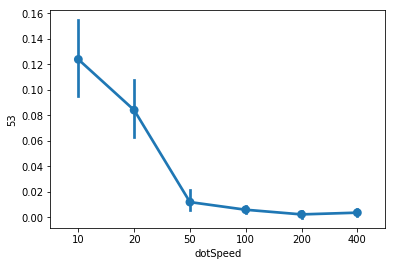

In [213]:
sns.pointplot(x='dotSpeed', y=str(nc), data=forward)

In [238]:
np.sort(forward.dotSpeed.unique())

array([ 10,  20,  50, 100, 200, 400])

In [217]:
forward[forward.dotSpeed==10][str(nc)].mean()

0.12380710691961269

In [221]:
numbercells = mean_sweep_response.shape[1]

In [228]:
speed_forward = np.empty((numbercells, 6, 2))
speed_backward = np.empty((numbercells, 6, 2))

In [243]:
for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique())):
    speed_forward[:,i,0] = mean_sweep_response[(stim_table.direction=='forward')&(stim_table.dotSpeed==speed)].mean()
    speed_forward[:,i,1] = mean_sweep_response[(stim_table.direction=='forward')&(stim_table.dotSpeed==speed)].std()/np.sqrt(len(mean_sweep_response[(stim_table.direction=='forward')&(stim_table.dotSpeed==speed)]))

In [256]:
for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='backward'].dotSpeed.unique())):
    speed_backward[:,i,0] = mean_sweep_response[(stim_table.direction=='backward')&(stim_table.dotSpeed==speed)].mean()
    speed_backward[:,i,1] = mean_sweep_response[(stim_table.direction=='backward')&(stim_table.dotSpeed==speed)].std()/np.sqrt(len(mean_sweep_response[(stim_table.direction=='backward')&(stim_table.dotSpeed==speed)]))

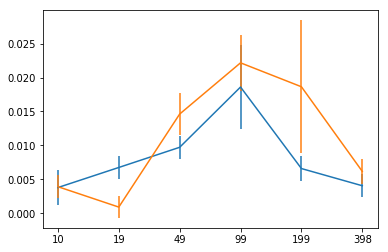

In [268]:
nc=0
plt.errorbar(range(6),speed_forward[nc,:,0], yerr=speed_forward[nc,:,1])
plt.errorbar(range(6),speed_backward[nc,:,0], yerr=speed_backward[nc,:,1])
plt.xticks(range(6), np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique()));

In [242]:
stim_table[stim_table.direction=='forward'].dotSpeed.unique()

array([ 10,  19, 199, 398,  49,  99])

In [260]:
np.where(np.max(speed_forward[nc,:,0])>np.max(speed_backward[nc,:,0]), 0,1)

array(1)

In [266]:
for nc in range(10):
    direction = np.where(np.max(speed_forward[nc,:,0])>np.max(speed_backward[nc,:,0]), 0,1)
    if direction==0: #forward
        pref_speed = np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique())[np.argmax(speed_forward[nc,:,0])]
    elif direction==1: #backward
        pref_speed = np.sort(stim_table[stim_table.direction=='backward'].dotSpeed.unique())[np.argmax(speed_backward[nc,:,0])]
    print(nc, pref_speed)
        
        
        
        

(0, 99)
(1, 10)
(2, 49)
(3, 19)
(4, 398)
(5, 10)
(6, 199)
(7, 49)
(8, 10)
(9, 10)


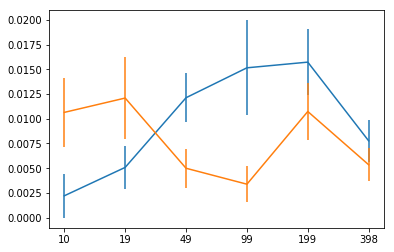

In [273]:
nc=6
plt.errorbar(range(6),speed_forward[nc,:,0], yerr=speed_forward[nc,:,1])
plt.errorbar(range(6),speed_backward[nc,:,0], yerr=speed_backward[nc,:,1])
plt.xticks(range(6), np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique()));

In [292]:
for expt in dot_expts:
    filename = os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/analysis_files', str(expt)+'_analysis.h5')
#     f = h5py.File(filename, 'r')
#     response = f['response'][()]
#     f.close()
    stim_table = pd.read_hdf(filename, 'stim_table')
    mean_sweep_response = pd.read_hdf(filename, 'mean_sweep_response')
    stim_table.rename(columns={'Unnamed: 0.1':'condition'}, inplace=True)
    numbercells = mean_sweep_response.shape[1]
    
    speed_forward = np.empty((numbercells, 6))
    speed_backward = np.empty((numbercells, 6))
    speed_right = np.empty((numbercells, 6))
    speed_left = np.empty((numbercells, 6))
    
    for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique())):
        speed_forward[:,i] = mean_sweep_response[(stim_table.direction=='forward')&(stim_table.dotSpeed==speed)].mean()
    for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='backward'].dotSpeed.unique())):
        speed_backward[:,i] = mean_sweep_response[(stim_table.direction=='backward')&(stim_table.dotSpeed==speed)].mean()
    for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='right'].dotSpeed.unique())):
        speed_right[:,i] = mean_sweep_response[(stim_table.direction=='right')&(stim_table.dotSpeed==speed)].mean()
    for i,speed in enumerate(np.sort(stim_table[stim_table.direction=='left'].dotSpeed.unique())):
        speed_left[:,i] = mean_sweep_response[(stim_table.direction=='left')&(stim_table.dotSpeed==speed)].mean()

    metrics = pd.DataFrame(columns=('expt_id','pref_speed_tr','pref_direction_tr','pref_speed_rot','pref_direction_rot'), index=range(numbercells))
    metrics['expt_id'] = expt
    
    
    for nc in range(numbercells):
        direction = np.where(np.max(speed_forward[nc,:])>np.max(speed_backward[nc,:]), 0,1)
        if direction==0: #forward
            pref_speed = np.sort(stim_table[stim_table.direction=='forward'].dotSpeed.unique())[np.argmax(speed_forward[nc,:])]
        elif direction==1: #backward
            pref_speed = np.sort(stim_table[stim_table.direction=='backward'].dotSpeed.unique())[np.argmax(speed_backward[nc,:])]
        metrics.pref_speed_tr.loc[nc] = pref_speed
        metrics.pref_direction_tr.loc[nc] = ['forward','backward'][direction]
        
        direction = np.where(np.max(speed_right[nc,:])>np.max(speed_left[nc,:]), 0,1)
        if direction==0: #right
            pref_speed = np.sort(stim_table[stim_table.direction=='right'].dotSpeed.unique())[np.argmax(speed_forward[nc,:])]
        elif direction==1: #left
            pref_speed = np.sort(stim_table[stim_table.direction=='left'].dotSpeed.unique())[np.argmax(speed_backward[nc,:])]
        metrics.pref_speed_rot.loc[nc] = pref_speed
        metrics.pref_direction_rot.loc[nc] = ['right','left'][direction]

    if expt==dot_expts[0]:
        speed_all = metrics.copy()
    else:
        speed_all = speed_all.append(metrics)
    

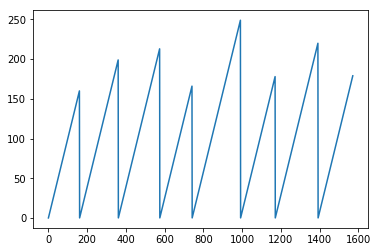

In [299]:
plt.plot(speed_all.index.values)

In [296]:
speed_all.rename(columns={'expt_id':'session_id'}, inplace=True)

In [300]:
speed_all['cell_id'] = speed_all.index

In [301]:
speed_valid = pd.merge(valid, speed_all, on=('session_id','cell_id'), how='left')

In [302]:
len(speed_valid)

1116

In [304]:
speed_all.to_csv(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/speed_pref.csv'))

In [5]:
speed_all = pd.read_csv(os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/speed_pref.csv'))

In [6]:
speed_all.head()

,Unnamed: 0,session_id,pref_speed_tr,pref_direction_tr,pref_speed_rot,pref_direction_rot,cell_id
0,0,925172886,10,backward,50,right,0
1,1,925172886,49,forward,50,right,1
2,2,925172886,10,backward,10,left,2
3,3,925172886,398,backward,400,right,3
4,4,925172886,398,backward,400,left,4


In [305]:
len(valid[(np.abs(valid.for_back)>0.4)&((valid.forward>0.85)|(valid.backward>0.85))])

118

In [309]:
speed_valid[(speed_valid.forward>0.85)|(speed_valid.backward>0.85)].pref_speed_tr.mean()

97.69834710743801

In [313]:
for a in areas:
    print(a, speed_valid[(speed_valid.area==a)&((speed_valid.forward>0.85)|(speed_valid.backward>0.85))].pref_speed_tr.mean())
    print(a, speed_valid[(speed_valid.area==a)&((speed_valid.right>0.85)|(speed_valid.left>0.85))].pref_speed_rot.mean())                 
                         
                         

('VISl', 109.6056338028169)
('VISl', 119.51923076923077)
('VISal', 73.23880597014926)
('VISal', 119.41176470588235)
('VISpm', 90.71212121212122)
('VISpm', 103.38028169014085)
('VISam', 130.71052631578948)
('VISam', 135.23809523809524)


Text(0,0.5,'dot speed')

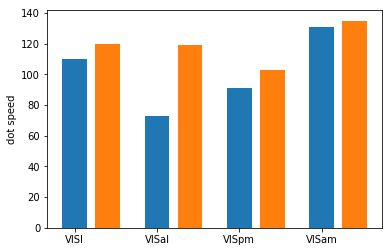

In [320]:
plt.bar(range(4), [110, 73, 91, 131], width=0.3)
plt.bar(np.arange(0.4, 4, 1.), [120, 119, 103, 135], width=0.3)
plt.xticks(range(4), areas);
plt.ylabel("dot speed")

In [322]:
for a in areas:
    print(a, speed_valid[(speed_valid.area==a)&(speed_valid.for_back>0.4)&(speed_valid.forward>0.85)].pref_speed_tr.mean(),
         speed_valid[(speed_valid.area==a)&(speed_valid.for_back<-0.4)&(speed_valid.backward>0.85)].pref_speed_tr.mean())

                         
                         

('VISl', 122.82608695652173, 105.5)
('VISal', 63.1, 57.65)
('VISpm', 89.8125, 55.0)
('VISam', 154.55555555555554, 151.0)


In [323]:
for a in areas:
    print(a, speed_valid[(speed_valid.area==a)&(speed_valid.right_left>0.4)&(speed_valid.right>0.85)].pref_speed_tr.mean(),
         speed_valid[(speed_valid.area==a)&(speed_valid.right_left<-0.4)&(speed_valid.left>0.85)].pref_speed_tr.mean())


('VISl', 83.75, 128.54166666666666)
('VISal', 82.41666666666667, 92.875)
('VISpm', 99.72727272727273, 182.33333333333334)
('VISam', 169.0, 99.0)


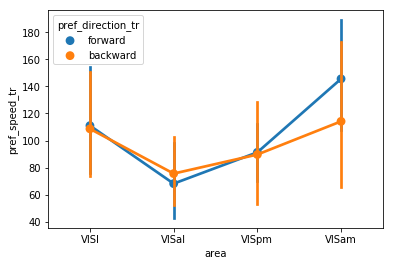

In [338]:
sns.pointplot(x='area',y='pref_speed_tr', data=speed_valid[(speed_valid.forward>0.85)|(speed_valid.backward>0.85)], hue='pref_direction_tr')
# sns.violinplot(x='area',y='pref_speed_tr', data=speed_valid[(speed_valid.forward>0.85)|(speed_valid.backward>0.85)], color='gray')

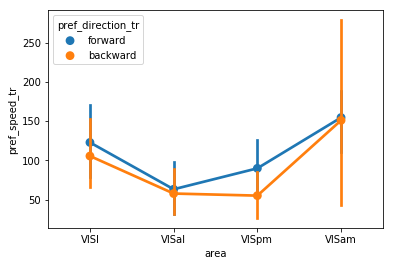

In [342]:
sns.pointplot(x='area',y='pref_speed_tr', data=speed_valid[(np.abs(speed_valid.for_back)>0.4)&((speed_valid.forward>0.85)|(speed_valid.backward>0.85))], hue='pref_direction_tr')
# sns.violinplot(x='area',y='pref_speed_tr', data=speed_valid[(speed_valid.forward>0.85)|(speed_valid.backward>0.85)], color='gray')

In [349]:
forward_areas = np.empty((4,2))
for i,a in enumerate(areas):
    forward_areas[i,0] = speed_valid[(speed_valid.area==a)&(speed_valid.forward>0.85)&(speed_valid.for_back>0.4)].pref_speed_tr.mean()
    forward_areas[i,1] = speed_valid[(speed_valid.area==a)&(speed_valid.forward>0.85)&(speed_valid.for_back>0.4)].pref_speed_tr.std()/np.sqrt(len(speed_valid[(speed_valid.area==a)&(speed_valid.forward>0.85)&(speed_valid.for_back>0.4)]))

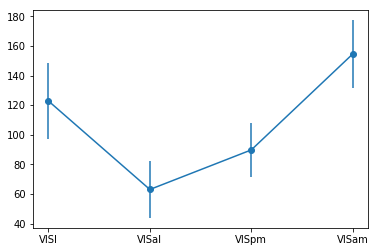

In [353]:
plt.errorbar(range(4), forward_areas[:,0], yerr=forward_areas[:,1], fmt='o-')
plt.xticks(range(4), areas);

In [351]:
import scipy.stats as st

In [354]:
st.ks_2samp(speed_valid[(speed_valid.area=='VISam')&(speed_valid.forward>0.85)&(speed_valid.for_back>0.4)].pref_speed_tr, speed_valid[(speed_valid.area=='VISal')&(speed_valid.forward>0.85)&(speed_valid.for_back>0.4)].pref_speed_tr)

Ks_2sampResult(statistic=0.5666666666666667, pvalue=0.05816855009831208)

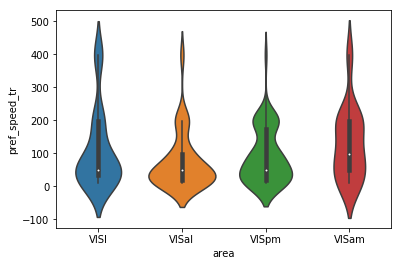

In [334]:
sns.violinplot(x='area',y='pref_speed_tr', data=speed_valid[(speed_valid.forward>0.85)|(speed_valid.backward>0.85)])

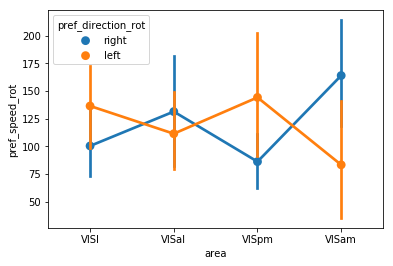

In [330]:
sns.pointplot(x='area',y='pref_speed_rot', data=speed_valid[(speed_valid.right>0.85)|(speed_valid.left>0.85)], hue='pref_direction_rot')

In [355]:
speed_valid.keys()

Index([u'cell_id', u'session_id', u'forward', u'backward', u'left', u'right',
       u'translation', u'rotation', u'right_left', u'for_back', u'trans_rot',
       u'exclude_code', u'exclusion_labels', u'height', u'mask', u'mask_page',
       u'valid', u'width', u'x', u'y', u'area', u'pref_speed_tr',
       u'pref_direction_tr', u'pref_speed_rot', u'pref_direction_rot'],
      dtype='object')

## Peak conditions per direction

In [406]:
conds = stim_table[stim_table.direction=='right'].condition.unique()

In [405]:
response.shape

(180, 161, 2)

In [408]:
np.argmax(response[conds, 0, 0])

29

In [410]:
stim_table[stim_table.condition==conds[29]].iloc[0]

Unnamed: 0             960
start                 5922
end                   5952
start_frame           9000
condition              150
approachSpeed          NaN
centerLocation         NaN
direction            right
dotNum                 300
dotSize                 12
dotSpeed                50
motion            rotation
duration                30
Name: 960, dtype: object

In [440]:
peak_all.session_id.unique()

array([925172886, 925166866, 924667518, 924496653, 923803144])

In [441]:
dot_expts

[925172886,
 925166866,
 924667518,
 924496653,
 923803144,
 923685768,
 923531162,
 923201739]

In [86]:
#HEREHERE
for expt in dot_expts:
    print expt
    filename = os.path.join(r'/Users/saskiad/Dropbox/Openscope Motion/analysis_files', str(expt)+'_analysis.h5')
    f = h5py.File(filename, 'r')
    response = f['response'][()]
    f.close()
    stim_table = pd.read_hdf(filename, 'stim_table')
    stim_table.rename(columns={'Unnamed: 0.1':'condition'}, inplace=True)
    stim_table['density'] = np.NaN
    stim_table.ix[stim_table.dotNum==300, 'density'] = 20
    stim_table.ix[stim_table.dotNum==545, 'density'] = 34
    stim_table.ix[stim_table.dotNum==1000, 'density'] = 52
    #TODO correct for dotsize too.

    stim_table.ix[stim_table.dotNum==485, 'density'] = 10
    stim_table.ix[stim_table.dotNum==1184, 'density'] = 28
    stim_table.ix[stim_table.dotNum==2888, 'density'] = 51

    stim_table.ix[stim_table.dotNum==2258, 'density'] = 14
    stim_table.ix[stim_table.dotNum==5180, 'density'] = 26
    stim_table.ix[stim_table.dotNum==11882, 'density'] = 50

    numbercells = response.shape[1]
    peak = pd.DataFrame(columns=('session_id','cell_id','direction','density','dotSize','dotSpeed', 'response'), index=range(4*numbercells))
    peak.session_id = expt
    for nc in range(numbercells):
        for i,direction in enumerate(['right','left','forward','backward']):
            locnum = (nc*4)+i
            if direction in ['forward','backward']:
                conds = stim_table[(stim_table.direction==direction)&(stim_table.density<30)&(stim_table.dotSize>1)].condition.unique()
            else:
                conds = stim_table[(stim_table.direction==direction)&(stim_table.density<30)&(stim_table.dotSize>5)].condition.unique()
            ind = np.argmax(response[conds, nc, 0])
            peak.cell_id.loc[locnum] = nc
            peak.direction.loc[locnum] = direction
            peak.density.loc[locnum] = stim_table[stim_table.condition==conds[ind]].density.iloc[0]
            peak.dotSize.loc[locnum] = stim_table[stim_table.condition==conds[ind]].dotSize.iloc[0]
            peak.dotSpeed.loc[locnum] = stim_table[stim_table.condition==conds[ind]].dotSpeed.iloc[0]
            peak.response.loc[locnum] = response[conds[ind],nc,0]
    
    if expt==dot_expts[0]:
        peak_all = peak.copy()
    else:
        peak_all = peak_all.append(peak)


925172886


/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  d

925166866
924667518
924496653
923803144
923685768
923531162
923201739


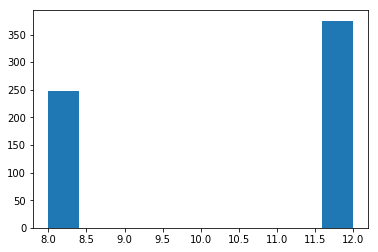

In [90]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['right','left']))].dotSize);

In [87]:
peak_all['response'] = peak_all.response.astype(float)

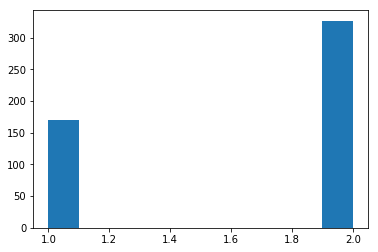

In [471]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['foward','backward']))].dotSize);

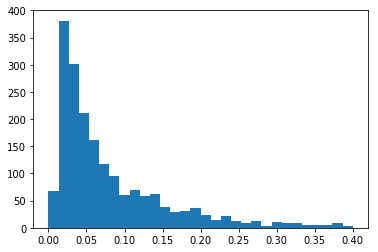

In [464]:
plt.hist(peak_valid[np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['right','left']))].response, range=(0,0.4), bins=30);

In [88]:
peak_test = pd.merge(peak_all, rois[['session_id','cell_id','valid']], on=('session_id','cell_id'))

In [89]:
peak_valid = peak_test[peak_test.valid]

In [457]:
len(peak_valid)

4464

In [466]:
len(peak_valid[peak_valid.response>0.05])

2063

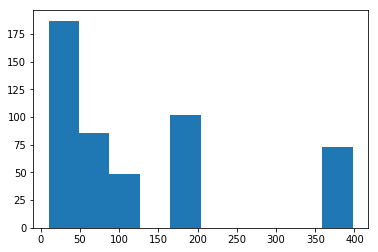

In [472]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['foward','backward']))].dotSpeed);

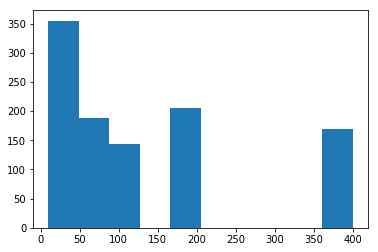

In [473]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['left','right']))].dotSpeed);

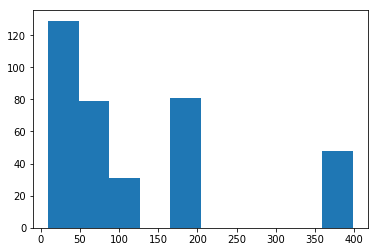

In [91]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['foward','backward']))].dotSpeed);

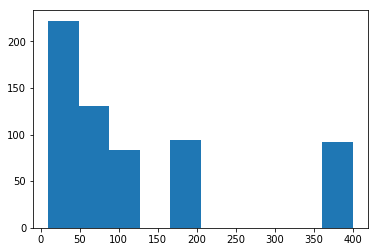

In [92]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['left','right']))].dotSpeed);

In [95]:
peak_valid['area'] = np.NaN
for i,expt in enumerate(dot_expts):
    peak_valid.ix[peak_valid.session_id==expt, 'area']=dot_areas[i]

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/saskiad/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [98]:
for a in areas:
    print a, peak_valid[peak_valid.area==a].dotSpeed.mean()

VISl 120.596085409
VISal 121.875905797
VISpm 120.529780564
VISam 162.5875


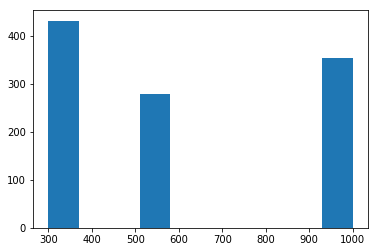

In [474]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['left','right']))].dotNum);

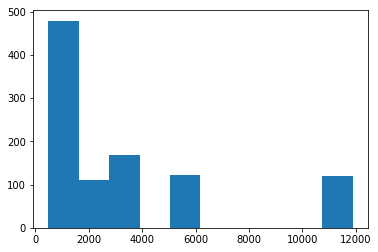

In [476]:
plt.hist(peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)&(peak_valid.direction.isin(['forward','backward']))].dotNum);

In [489]:
peak_resp.unique_id.iloc[8]

925172886.009

In [100]:
peak_resp = peak_valid[(peak_valid.response>0.05)&np.isfinite(peak_valid.response)]

In [101]:
peak_resp['unique_id'] = peak_resp.session_id+(peak_resp.cell_id/1000.)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [492]:
subset = peak_resp[peak_resp.unique_id==peak_resp.unique_id.iloc[8]]
np.argmax(subset.response)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


36

In [494]:
subset.loc[36]

session_id      925172886
cell_id                 9
direction           right
dotNum                545
dotSize                 5
dotSpeed              100
response          1.20645
valid                True
unique_id     9.25173e+08
Name: 36, dtype: object

In [102]:
newpeak = pd.DataFrame(columns=(peak_resp.keys()))
for uid in peak_resp.unique_id.unique():
    subset = peak_resp[peak_resp.unique_id==uid]
    ind = np.argmax(subset.response)
    newpeak = newpeak.append(subset.loc[ind])

/Users/saskiad/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [107]:
for a in areas:
    print a, newpeak[newpeak.area==a].dotSpeed.mean(), newpeak[newpeak.area==a].dotSpeed.std()/np.sqrt(len(newpeak[newpeak.area==a]))

 VISl 113.30526315789474 8.564103447342077
VISal 108.25 9.418977564724308
VISpm 98.8075117370892 8.096841535775635
VISam 146.82608695652175 14.36220594319073


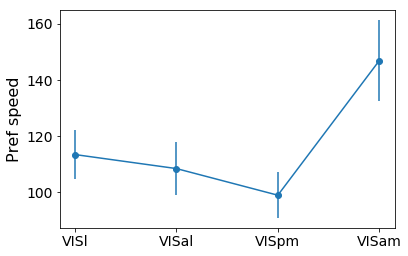

In [112]:
plt.errorbar(range(4), [113.3, 108.3, 98.8, 146.8], yerr=[8.6, 9.4, 8.1, 14.4], fmt='o-')
plt.xticks(range(4), areas, fontsize=14);
plt.ylabel("Pref speed", fontsize=16)
plt.tick_params(labelsize=14)

In [113]:
import scipy.stats as st

In [120]:
st.ks_2samp(newpeak[newpeak.area=='VISl'].dotSpeed, newpeak[newpeak.area=='VISpm'].dotSpeed)

Ks_2sampResult(statistic=0.17104027674820857, pvalue=0.004809875120811268)

In [20]:
newpeak['dotNum'] = newpeak.dotNum.astype(float)
newpeak['dotSpeed'] = newpeak.dotSpeed.astype(float)
newpeak['dotSize'] = newpeak.dotSize.astype(float)

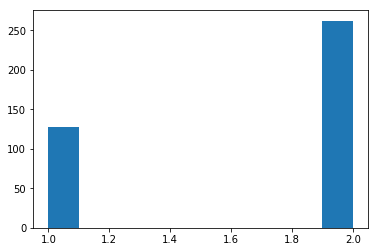

In [23]:
plt.hist(newpeak[(newpeak.direction.isin(['forward','backward']))].dotSize);

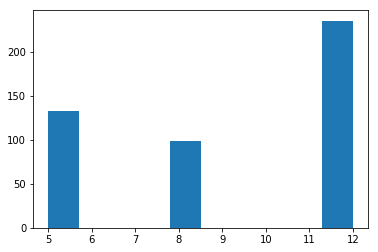

In [24]:
plt.hist(newpeak[(newpeak.direction.isin(['left','right']))].dotSize);

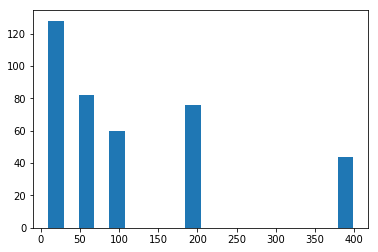

In [27]:
plt.hist(newpeak[(newpeak.direction.isin(['forward','backward']))].dotSpeed, bins=20);

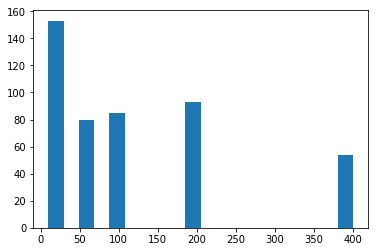

In [28]:
plt.hist(newpeak[(newpeak.direction.isin(['left','right']))].dotSpeed, bins=20);

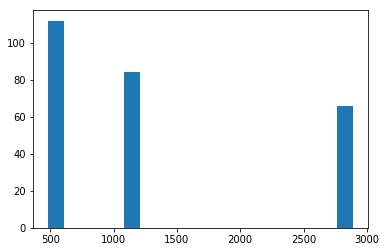

In [34]:
plt.hist(newpeak[(newpeak.direction.isin(['forward','backward']))&(newpeak.dotNum.isin([485,1184,2888]))].dotNum, bins=20);

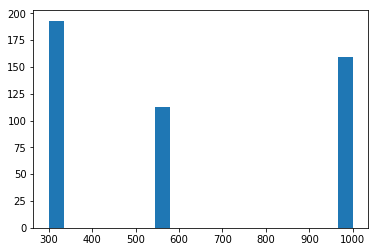

In [30]:
plt.hist(newpeak[(newpeak.direction.isin(['left','right']))].dotNum, bins=20);

- 2 seconds
- 6 speeds
- 2 windows
- 10 trials
- 10 conditions (2 translation, 8 rotation)

= 4 minutes for one trial of everything

In [123]:
(2*6*2*10*10)/60.

40.0

40

In [126]:
915*2/60.

30.5

In [131]:
((5*5*6*8)+60)*1.5/60.

31.5

In [ ]:
    def get_sfdi(self, pref_ori, pref_phase, nc):
        '''computes spatial frequency discrimination index for cell

Parameters
----------
preferred orientation
preferred phase
cell index

Returns
-------
sf discrimination index
        '''
        sf_tuning = self.response_events[pref_ori,1:,pref_phase,nc,0]
        trials = self.mean_sweep_events[(self.stim_table.orientation==self.orivals[pref_ori])&(self.stim_table.phase==self.phasevals[pref_phase])][str(nc)].values
        SSE_part = np.sqrt(np.sum((trials-trials.mean())**2)/(len(trials)-5))
        return (np.ptp(sf_tuning))/(np.ptp(sf_tuning) + 2*SSE_part)